# <div align="center"> Air Pollution in India </div>

<div align="center"> candidate numbers: 50250, 33724, 50691 </div>

# Introduction:

Air pollution is a big problem in India. For more than a decade, Delhi has been the most polluted city in the world, and out of the 30 cities in the world with the worst air pollution, 21 are located in India (Clean Air Fund, n.d.; Ellis-Petersen, 2024). In November 2024, the air quality index (AQI) in Delhi reached 1700, with higher index levels indicating more air pollution. For comparison, the World Health Organization considers 50 to be the maximum AQI level that is still healthy (Ellis-Petersen, 2024). During periods with high air pollution, Indians therefore can experience health complaints such as shortness of breath (Yadav, 2024). 

Because of the severe effects of the air quality on people's health, trying to improve the air quality is an important issue. Not only emissions caused by human economic behaviour affect the air quality, also weather circumstances play a role (Yadav, 2024; Ellis-Petersen, 2024). During the winter for example, relatively cold and stagnant weather can trap pollutants close to the ground, decreasing the air quality (Yadav, 2024). As climate change continues, these weather effects can even further increase as periods with less wind will become more frequent in northern India, enlargening the already severe air quality problem (Clase, 2024). Therefore, to improve the air quality, it is important to know which factors are associated with air pollution. In this report, we will therefore investigate the following research question:

**Which economic and environmental factors are associated with the air pollution (AQI) in India on state and city level in January 2024?**


As the air quality is said to decrease during winters due to a combination of human and weather characteristics, we will investigate the air quality in 136 cities, spread over 29 states, in January 2024. As mentioned before, we include both environmental and economic factors into our analysis. The choice for the environmental and economic variables is a combination of potential relevant factors and data availability. Especially the latter imposed a restricting factor, as it can be quite difficult to obtain detailed data on certain economic variables on state or city level. For that reason, we have decided to do an analysis on state level, and then zoom in onto city level with the factors for which we have city level data. In the *Data engineering: acquisition and cleaning* Section, we will explain how we acquired the data for these factors. Now, we will shortly explain the rationale behind choosing each of these potential associated factors:

 - Population: As increases in population are related to higher levels of economic activity, which in turn may result in air pollution, population can be an indirect factor associated with air pollution. 
 - State area: State area indicates how many space there is for economic activities, which could increase air pollution, or nature, which could improve the air quality. The state area thus could be a factor associated with air pollution, as the larger the state, the larger the effect on the air pollution may be. 
 - Forest area: Forests can improve the air quality as forests can filter the air, and hence can be associated with air quality. 
 - Farming area: during the winter months, many farmers prepare their land for winter sowing by burning the land, which can release a lot of pollution. Therefore, the farming area might be associated with the air quality, especially in winter months (Ellis-Petersen, 2024). 
 - Farmers: during the winter months, many farmers prepare their land for winter sowing by burning the land, which can release a lot of pollution. Thereofre, the number of farmers might be associated with the air quality, especially in winter months(Ellis-Petersen, 2024). 
 - Registered vehicles: cars emit pollutants, and hence the number of cars could be associated with the air quality.
 - Factories: Factories can also be polluting, and hence the number of factories could be associated with the air quality.
 - Shipping Cargo Volume: The shipping cargo volumes are associated with ports. Ports can be polluting places, and hence this might be associated with the air quality. 
 - Coal Capacity: indicates the maximum electricity output. Electricity plants emit a lot of polluting gasses when transforming coal into electricity, and hence the amount of electricity that is produced could be associated with the air quality.
 - Gas Capacity: indicates the maximum electricity output. Electricity plants emit a lot of polluting gasses when transforming gas into electricity, and hence the amount of electricity that is produced could be associated with the air quality.
 - Temperature: as temperatures may drop during the winter, this can create a thin layer of atmosphere around the earth in which the pollutants are trapped. Hence, temperature might be associated with air quality (UCAR Center for Science Education, n.d.).
 - Pressure: high pressure can create stagnant air, which may cause pollutants to concentrate in one area and hence, pressure can be associated with air quality (UCAR Center for Science Education, n.d.). 
 - Humidity: Humidity can reduce the air circulation. Pollutants might become trapped in one place, which therefore could be associated with the air quality. 
 - Wind: wind can spread pollutants over a larger area, decreasing the concentration of pollutants in certain places. Hence, more wind could be associated with better air quality.
 - Precipitation: precipitation can remove certain pollutants from the air, such as dust, and hence it can be associated with the air quality. 
 - Clouds: Clouds tend to block sunlight during the day. This can slow down the formation of ozone, hence more clouds could be associated with better air quality (UCAR Center for Science Education, n.d.).
 - Sunshine: Contrarily, more sunshine can lead to more ozone production. Therefore, more sunshine hours could be negatively associated with air quality (UCAR Center for Science Education, n.d.).
 
 This dataset therefore can be used as an exploratory analysis based on publicly available data of potential economic and environmental factors associated with air pollution in India in January. To investigate the association between the economic and environmental factors and the air pollution, we create two dataframes in this notebook, one for an analysis on state level, and one for an analysis on city level. We explore both of these dataframes, and perform statistical modelling. On state level, we do a K-means clustering and Lasso regression. On city level, we use a Lasso regression and a Random Forest. Because the goal of this research is to perform an exploratory analysis of potential economic and environmental factors associated with air pollution, further research can be done into the association, and maybe even causation, of air pollution in India based on the results of our research.
 
The rest of this notebook is built up as follows. First, the data will be acquired and cleaned. After that, an initial data exploration will be performed, followed by data visualizations on both state and city level. Then, some statistical modelling is performed, again both on state and city level, after which we draw our conclusions and address the limitations and further research opportunities. 

In [1]:
# Basic and webscraping
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#For geography
import geopandas
import numba
from geodatasets import get_path
from scipy.spatial.distance import pdist, squareform


#Analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# So pandas does not complain.
pd.set_option('future.no_silent_downcasting', True)
# So pandas does not give scientific notation.
pd.options.display.float_format = '{:.4f}'.format


In [68]:
# Read the READ_ME_INDIA file for information on replicability.

In [2]:
print(os.getcwd())
# Directory should be at github repo level.
# .. to move up to directory level.
os.chdir("..")
print(os.getcwd())

/Users/elenalarrauri/LSE/COURSES/AT/Managing_data/2024-project-pollution-team/CODE_INDIA
/Users/elenalarrauri/LSE/COURSES/AT/Managing_data/2024-project-pollution-team


# Data engineering: acquisition and cleaning

In this Section, we show how we obtained the data and cleaned it where necessary. We start our data acquisition with a list of cities in which an AQI station taking daily records is present. For each of these cities (1 data point), we aim to find multiple variables that are hypothetically associated with the AQI. These variables are sourced from multiple datasources, including government reports, meteorological API's and transport department records. As far as possible, official government reports have been used to collect the data. Below, the data acquisition is shown, where the source of the data is stated above each data acquisition part.

## Independent Variables (Features)

Below, we present a Dictionary with the key being the name of the state and the values being a list of cities that record their AQI daily in that state.

In [3]:
#Dictionary of cities in a state in India (cities which record their aqi)
cities = {
    'arunachal pradesh': ['naharlagun'],
    'jammu and kashmir': ['srinagar'],
    'andhra pradesh': ['chittoor', 'kadapa', 'anantapur', 'visakhapatnam', 'amaravati', 'vijayawada', 'rajamahendravaram', 'tirupati'],
    'telangana': ['hyderabad'],
    'manipur': ['imphal'],
    'madhya pradesh': ['mandideep', 'satna', 'bhopal', 'ratlam', 'gwalior', 'katni', 'maihar', 'damoh', 'dewas', 'jabalpur', 'ujjain', 'sagar', 'singrauli', 'pithampur', 'indore'],
    'haryana': ['ambala', 'sirsa', 'palwal', 'kurukshetra', 'ballabgarh', 
                'manesar', 'narnaul', 'gurugram', 'karnal', 'bahadurgarh', 
                'rohtak', 'kaithal', 'sonipat', 'mandikhera', 'faridabad', 
                'hisar', 'yamunanagar', 'charkhi_dadri', 'jind', 'panipat', 
                'bhiwani', 'panchkula', 'fatehabad', 'dharuhera'],
    'gujarat': ['ankleshwar', 'gandhinagar', 'surat', 'vapi', 'vatva', 'ahmedabad', 'nandesari'],
    'sikkim': ['gangtok'],
    'himachal pradesh': ['baddi'],
    'delhi': ['delhi'],
    'punjab': ['ludhiana', 'bathinda', 'mandi_gobindgarh', 'khanna', 'rupnagar', 'jalandhar', 'amritsar', 'patiala'],
    'karnataka': ['mysuru', 'yadgir', 'kolar', 'koppal', 'bidar', 
                  'vijayapura', 'gadag', 'mangalore', 'kalaburagi', 'hubballi', 
                  'udupi', 'belgaum', 'madikeri', 'haveri', 'tumakuru', 
                  'bengaluru', 'dharwad', 'hassan', 'shivamogga', 
                  'chikkamagaluru', 'chamarajanagar', 'chikkaballapur', 
                  'bagalkot', 'davanagere', 'ramanagara', 'raichur', 'karwar'],
    'maharashtra': ['latur', 'kalyan', 'sangli', 'dhule', 'bhiwandi', 'virar', 
                    'kolhapur', 'nagpur', 'chandrapur', 'pune', 'jalgaon', 
                    'solapur', 'ulhasnagar', 'amravati', 'parbhani', 
                    'badlapur', 'akola', 'boisar', 'mumbai', 'jalna', 'nashik', 
                    'belapur', 'malegaon', 'thane', 'navi_mumbai', 'mahad', 'nanded'],
    'odisha': ['baripada', 'bileipada', 'angul', 'tensa', 'cuttack', 'balasore', 'keonjhar', 'rairangpur', 'talcher', 'byasanagar', 'suakati', 'rourkela', 'nayagarh', 'barbil', 'brajrajnagar'],
    'rajasthan': ['sirohi', 'baran', 'banswara', 'hanumangarh', 'bharatpur', 
                  'bikaner', 'jalore', 'bhiwadi', 'sikar', 'karauli', 
                  'bhilwara', 'alwar', 'bundi', 'dausa', 'chittorgarh', 
                  'barmer', 'jaipur', 'jaisalmer', 'pratapgarh', 
                  'sawai_madhopur', 'jhalawar', 'jhunjhunu', 'nagaur', 'ajmer', 
                  'rajsamand', 'jodhpur', 'sri_ganganagar', 'pali', 'kota', 
                  'dholpur', 'dungarpur', 'tonk', 'churu', 'udaipur'],
    'chandigarh': ['chandigarh'],
    'kerala': ['thiruvananthapuram', 'thrissur', 'kozhikode', 'kollam', 'kannur', 'eloor', 'ernakulam', 'kochi'],
    'chhattisgarh': ['bhilai', 'chhal', 'milupara', 'bilaspur', 'raipur', 'tumidih', 'kunjemura', 'korba'],
    'tripura': [],
    'mizoram': ['aizawl'],
    'assam': ['silchar', 'nalbari', 'guwahati', 'nagaon', 'sivasagar', 'byrnihat'],
    'meghalaya': ['shillong'],
    'tamil nadu': ['tiruchirappalli', 'nagapattinam', 'coimbatore', 'vellore', 'ranipet', 'dindigul', 'tirupur', 'ooty', 'kanchipuram', 'tirunelveli', 'chennai', 'gummidipoondi', 'perundurai', 'thanjavur', 'cuddalore', 'karur', 'thoothukudi', 'pudukottai', 'ariyalur', 'salem', 'madurai', 'ramanathapuram', 'virudhunagar', 'hosur', 'palkalaiperur', 'chengalpattu'],
    'west bengal': ['kolkata', 'haldia', 'durgapur', 'siliguri', 'asansol', 'howrah', 'barrackpore'],
    'uttarakhand': ['kashipur', 'rishikesh', 'dehradun'],
    'uttar pradesh': ['agra', 'prayagraj', 'meerut', 'jhansi', 'greater_noida', 'kanpur', 'bulandshahr', 'lucknow', 'firozabad', 'moradabad', 'hapur', 'vrindavan', 'ghaziabad', 'bareilly', 'noida', 'varanasi', 'muzaffarnagar', 'gorakhpur', 'khurja', 'baghpat'],
    'puducherry': ['puducherry'],
    'bihar': ['rajgir', 'araria', 'bettiah', 'begusarai', 'katihar', 'saharsa', 'samastipur', 'motihari', 'muzaffarpur', 'bhagalpur', 'buxar', 'darbhanga', 'sasaram', 'bihar_sharif', 'purnia', 'manguraha', 'patna', 'arrah', 'hajipur', 'siwan', 'chhapra', 'kishanganj', 'munger', 'gaya'],
    'jharkhand': ['dhanbad', 'jorapokhar', 'pathardih'],
    'nagaland': ['kohima'],
    'goa': []
}


Each year, the Indian government conducts a yearly census for the entire country. However, the number of residents in a state is not included there, but part of a state wise census conducted by each state government. As there is not a common platform on which the state governments publish their population data, we have not found a governmental source with all state level population data. Therefore, we have used an external source, Statistics Times (2024), that combines government reports to create one state wise population dataset. We obtained data from this source through webscraping. 

The data is scraped from a table in this website that consists of the state name, the state population in 2023 and 2024, and some other variables. Those other variables are not relevant for our analysis, and hence only the state name and the 2024 population data is scraped and stored as a dictionary. 

In [4]:
#Webscraping to find the population of states in India
#Source: https://statisticstimes.com/demographics/india/indian-states-population.php, 2024 data

url = "https://statisticstimes.com/demographics/india/indian-states-population.php"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

state_population = {}

table_body = soup.find('tbody')
# loop through each row in the table
if table_body:
    rows = table_body.find_all('tr')
    for row in rows:
        state_td = row.find('td', {'class': 'name'})  # State name
        data_tds = row.find_all('td', {'class': 'data'})  
        if state_td and len(data_tds) >= 2:  # ensure the second `data` exists which is the data for 2024
            state_name = state_td.text.strip().lower()  
            if state_name == 'jammu & kashmir':  # for API data formatting
                state_name = 'jammu and kashmir'
            population = data_tds[1].text.strip().replace(',', '')
            try:
                state_population[state_name] = int(population)  # convert population to integer
            except ValueError:
                state_population[state_name] = population  

As there are over 4000 cities and towns in India, it is extremely difficult to conduct a census at city level for each city. The list of cities that record their AQI values daily ranges from medium-sized towns to metropolitan cities. As we could not find an official government source about the population of all these cities, we have used an external data source, World Population Review (2024), who tries to compute the populations of the larger cities. However, data for smaller cities is unavailable at this website and could also not be found through governmental reports. The World Population Review website contains a table with the city name and 2024 population for 400 cities. This information was webscraped and stored as a dictionary. 

In [5]:
#Webscraping to find the population of cities in India
#Source: https://worldpopulationreview.com/cities/india, 2024 data

url = "https://worldpopulationreview.com/cities/india"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

city_population = {}
table_body = soup.find('tbody', {'class': 'relative z-10 text-sm'})

# loop through each row in the table
if table_body:
    rows = table_body.find_all('tr')
    for row in rows:
        th = row.find('th')  
        td = row.find('td')  
        if th and td:
            city_name = th.text.strip().lower()
            population = td.text.strip().replace(',', '')
            city_population[city_name] = int(population)

It is hypothesised that the area of the state (size of the state) will be associated with the AQI of the state. Therefore the data for each state is taken from a government report (Forest Survey India p.17, 2021). On page 17 in this report, there is a table provided from which the state name and the corresponding geographical area column are copied and stored as a dictionary.

In [6]:
#Area of the state, hypothesis: a larger state implies higher population and hence affects pollution
# Source: https://fsi.nic.in/isfr-2021/chapter-2.pdf page 17, 
# Geo-graphical Area Column, 2021 data

state_area = {
    'andhra pradesh': 162968,
    'arunachal pradesh': 83743,
    'assam': 78438,
    'bihar': 94163,
    'chhattisgarh': 135192,
    'delhi': 1483,
    'goa': 3702,
    'gujarat': 196244,
    'haryana': 44212,
    'himachal pradesh': 55673,
    'jharkhand': 79716,
    'karnataka': 191791,
    'kerala': 38852,
    'madhya pradesh': 308252,
    'maharashtra': 307713,
    'manipur': 22327,
    'meghalaya': 22429,
    'mizoram': 21081,
    'nagaland': 16579,
    'odisha': 155707,
    'punjab': 50362,
    'rajasthan': 342239,
    'sikkim': 7096,
    'tamil nadu': 130060,
    'telangana': 112077,
    'tripura': 10486,
    'uttar pradesh': 240928,
    'uttarakhand': 53483,
    'west bengal': 88752,
    'andaman and nicobar islands': 8249,
    'chandigarh': 114,
    'jammu and kashmir': 222236,
    'lakshwadeep': 30,
    'puducherry': 490
}

It is hypothesised that the forest covering area in a state will be associated with the AQI of the state as more greenery implies less pollution. Therefore the data for each state's forest cover is also collected from the Forest India Survey (p.17-18, 2024). These pages contain a table from which the state name and the corresponding total forest cover (area) column are copied and stored as a dictionary. 

In [7]:
# Hypothesis: an increased forest cover reduces the pollution 
#Source: https://fsi.nic.in/isfr-2021/chapter-2.pdf page 17-18, 
# Total Forest Cover column, 2021 data

state_forest_area = {
    'andhra pradesh': 29784,
    'arunachal pradesh': 66431,
    'assam': 28312,
    'bihar': 7381,
    'chhattisgarh': 55717,
    'delhi': 195,
    'goa': 2244,
    'gujarat': 14926,
    'haryana': 1603,
    'himachal pradesh': 15443,
    'jharkhand': 23721,
    'karnataka': 38730,
    'kerala': 21253,
    'madhya pradesh': 77493,
    'maharashtra': 50798,
    'manipur': 16598,
    'meghalaya': 17046,
    'mizoram': 17820,
    'nagaland': 12251,
    'odisha': 52156,
    'punjab': 1847,
    'rajasthan': 16655,
    'sikkim': 3341,
    'tamil nadu': 26419,
    'telangana': 21214,
    'tripura': 7722,
    'uttar pradesh': 14818,
    'uttarakhand': 24305,
    'west bengal': 16832,
    'andaman and nicobar islands': 6744,
    'chandigarh': 22.88,
    'jammu and kashmir': 23659,
    'lakshwadeep': 27.10,
    'puducherry': 53.30
}

The Indian government provides the number of total registered vehicles in a city, but only for cities with a population larger than 1 million citizens. For the smaller cities, the number of registered vehicles is difficult to track. Often, cars in smaller cities are not even registered there, but in closeby larger cities as the registering process in the larger cities is easier. As a result, the excel sheet from the official government website only consists of 56 cities (Indian Government, 2020). This excel sheet is downloaded and the city name and corresponding total number of registered vehicles are extracted and stored as a dictionary. The source of the excel file is the following:

In [8]:
# Source: https://www.data.gov.in/resource/cities-wise-total-registered-motor-vehicles-transport-million-plus-cities-india-31st-march
# Excel file downloaded from website 2020 data

cars_df = pd.read_csv("DATA_INDIA/cars.csv")
i = cars_df.iloc[:, 0].str.lower()  
j = cars_df.iloc[:, -1].astype(int)  
city_cars = dict(zip(i, j))

The number of registered vehicles at the state level is recorded by the Transport Department of India (p. 91, 2020). Vehicles are a major source of poisonous gases and vehicles in India still primarily operate on petrol and diesel. As a result it is expected to be an important factor associated to the AQI. The Transport Department of India (p.91, 2020) provides us with a table consisting of the state name and the total amount of registered motorvehicles in the state, which in our code is stored as a dictionary.

In [9]:
# Hypothesis: Vehicles are a source of pollution and higher the number of vehicles more the pollution
#Source: https://morth.nic.in/sites/default/files/RTYB_Publication_2019_20%20(1).pdf page 91, 
# Column used Total registered motorvehicles (As on 31.3.2020), 2019-20 data

state_vehicles = {
    'andhra pradesh': 13108491,
    'arunachal pradesh': 230126,
    'assam': 4358529,
    'bihar': 9903889,
    'chhattisgarh': 6986219,
    'goa': 1457752,
    'gujarat': 26836981,
    'haryana': 8599668,
    'himachal pradesh': 1711920,
    'jammu and kashmir': 1967508,
    'jharkhand': 5064983,
    'karnataka': 26117614,
    'kerala': 14184184,
    'madhya pradesh': 17923162,
    'maharashtra': 37786256,
    'manipur': 361970,
    'meghalaya': 365804,
    'mizoram': 267350,
    'nagaland': 520293,
    'odisha': 9115718,
    'punjab': 11336366,
    'rajasthan': 19236010,
    'sikkim': 54106,
    'tamil nadu': 32094588,
    'telangana': 12906426,
    'tripura': 551097,
    'uttarakhand': 2898982,
    'uttar pradesh': 34924824,
    'west bengal': 10915952,
    'andaman and nicobar islands': 150060,
    'chandigarh': 1058857,
    'delhi': 11892877,
    'lakshadweep': 22665,
    'puducherry': 1118782
}

It is hypothesised that farming causes air pollution through stubble burning, excessive use of chemical fertilizers, pesticide sprays, and methane emissions from rice paddies and livestock. In India crops are burned seasonally to prepare the fields for the next harvesting season. This coincides with a spike in the AQI in the region. Therefore, thee area of farm land and its association to AQI should be explored. The Agricultural department of India (p.19, 2023) publishes an annual report with the area of land in a state being used for farming. From the table in the report, the Net area sown is considered as the land used for farming. This excludes the barren land and land on which crops are not grown during that year. The data is stored as a dictionary in this code.

In [10]:
#Source: https://desagri.gov.in/wp-content/uploads/2024/09/Final-file-of-LUS-2022-23-for-uploading.pdf page 19, 
# net area sown taken as the area of land used for cultivation, 2022-23 data

state_farming_area = {
    'andhra pradesh': 35.13,
    'arunachal pradesh': 3.54,
    'assam': 35.05,
    'bihar': 54.63,
    'chhattisgarh': 32.50,
    'goa': 34.85,
    'gujarat': 51.83,
    'haryana': 82.33,
    'himachal pradesh': 11.62,
    'jammu and kashmir': 19.01,
    'jharkhand': 12.86,
    'karnataka': 58.59,
    'kerala': 51.20,
    'madhya pradesh': 51.53,
    'maharashtra': 53.62,
    'manipur': 18.37,
    'meghalaya': 12.45,
    'mizoram': 7.10,
    'nagaland': 21.77,
    'odisha': 28.58,
    'punjab': 81.70,
    'rajasthan': 53.74,
    'sikkim': 16.91,
    'tamil nadu': 37.12,
    'telangana': 52.61,
    'tripura': 24.26,
    'uttarakhand': 9.47,
    'uttar pradesh': 68.56,
    'west bengal': 60.06,
    'andaman and nicobar islands': 2.06,
    'chandigarh': 12.74,
    'delhi': 13.31,
    'lakshadweep': 41.05,
    'puducherry': 33.81
}

Another measure to identify the association between agriculture and air pollution is to use the number of farmers in a state as a measure for the amount of farming done in that state. The Agricultural department (p. 21, 2023), in its report includes the number of agricultural workers in the state in 2022. The report consists of a table from which the total agricultural labour (main and marginal) is taken and stored in a dictionary along with the state. As data for the state Telangana was missing, we used data on the number of farmers in Telangana in 2022 from the Telangana Government (p.49, 2022). 

In [11]:
# Another measure for the pollution caused by agriculture
#Source: https://desagri.gov.in/wp-content/uploads/2023/05/Agricultural-Statistics-at-a-Glance-2022.pdf page 21
#Column used: Agricultural Labour (Main and Marginal), 2022 data
#For Telangana data unavailable on these source so state source used for total agricultural workers:
#source: https://horticulture.tg.nic.in/downloads/TelanganaStateStatisticalAbstract_19_Jan_2022.pdf page 49

farmers = {
    'arunachal pradesh': 36171,
    'jammu and kashmir': 547705,
    'andhra pradesh': 16967754,
    'telangana': 'NA',
    'manipur': 114918,
    'madhya pradesh': 12192267,
    'haryana': 1528133,
    'gujarat': 6839415,
    'sikkim': 25986,
    'himachal pradesh': 175038,
    'delhi': 39475,
    'punjab': 1588455,
    'karnataka': 7155963,
    'maharashtra': 13486140,
    'odisha': 6739993,
    'rajasthan': 4939664,
    'chandigarh': 1687,
    'kerala': 1322850,
    'chhattisgarh': 5091882,
    'tripura': 353618,
    'mizoram': 41787,
    'assam': 1845346,
    'meghalaya': 198364,
    'tamil nadu': 9606547,
    'west bengal': 10188842,
    'uttarakhand': 403301,
    'uttar pradesh': 19939223,
    'puducherry': 68391,
    'bihar': 18345649,
    'jharkhand': 4436052,
    'nagaland': 62962,
    'telangana': 5915151    
}


India has a large number of factories which are hypothesised to be associated to the AQI. The manufacturing factories for various different industries are known to produce large amount of wastes and smoke. Therefore it is important to account for the relation between high number of factories (as in industrial cities and states) and the AQI. The government publishes a report with the number of factories operational in a year in a state. From this report the state and the corresponding number of factories (from the column "working on any day of the year") are taken and stored as a dictionary (Labour Bureau, 2020, p.34). The data is for 2020. 

In [12]:
#Hypothesis: Factories are a significant cause of air pollution, higher the number of factories in a 
# state higher the pollution. Therefore a feature to estimate the polltuion cause due to industrialisation
#Source: https://labourbureau.gov.in/uploads/pdf/FA_2020.pdf page 34, 
#Column used: Working on any day during the year, 2020 data

state_factories = {
    'andhra pradesh': 0,
    'arunachal pradesh': 0,
    'assam': 6425,
    'bihar': 6345,
    'chhattisgarh': 5103,
    'goa': 0,
    'gujarat': 36727,
    'haryana': 13780,
    'himachal pradesh': 5254,
    'jammu and kashmir': 1183,
    'jharkhand': 6449,
    'karnataka': 0,
    'kerala': 21464,
    'madhya pradesh': 6895,
    'maharashtra': 0,
    'manipur': 952,
    'meghalaya': 293,
    'mizoram': 4,
    'nagaland': 1032,
    'odisha': 1994,
    'punjab': 0,
    'rajasthan': 12169,
    'sikkim': 0,
    'tamil nadu': 28200,
    'telangana': 15056,
    'tripura': 881,
    'uttarakhand': 3463,
    'uttar pradesh': 0,
    'west bengal': 0,
    'andaman and nicobar islands': 43,
    'chandigarh': 423,
    'delhi': 0,
    'lakshadweep': 0,
    'puducherry': 2139
}

Inida is a peninsula surrounded by water at three sides. As a result, it heavily participates in trade by sea and has numerous ports varying in size, located along the coastline. Ships and port machinery are known to generate vast amouts of gases that would affect the air quality of that area. As a result, to estimate the number of ships in the ports at each state the cargo volume handled at these ports is considered. It is assumed that the volume of the cargo handled will be directly proportional to the amount of ship traffic and that the sizes of the ships are almost the same. With these assumptions, the volume of the cargo handled at each state can be used to understand the relation between AQI and pollution from ports. This data is webscraped from an external source that used a government report as its primary source (Statista, 2023). The website consists of a table from which the state name and the shipping volume are extracted and stored in a dictionary. Three small states (2 of which are islands) are combined and stored as 'Other' on the website. It is assumed that each of these three states handles equal amounts of cargo and the hence their values in the dictionary are saved accordingly.

In [13]:
#Webscriping to find the volume of cargo handled at ports in a state, this is significant as Inida is a peninsula 
# surrounded by water at 3 sides. Hypothesis: Higher cargo volume from ports contributes to air pollution through 
# emissions from ships, port machinery, and increased truck and rail transport.
#Source: https://www.statista.com/statistics/692571/cargo-traffic-volume-at-ports-by-state-india/ 2023 data

url = "https://www.statista.com/statistics/692571/cargo-traffic-volume-at-ports-by-state-india/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

state_cargo_volume = {}

# Find the table body
table_body = soup.find('tbody')

# loop through each row in the table
if table_body:
    rows = table_body.find_all('tr')
    for row in rows:
        tds = row.find_all('td')  # Get all <td> elements in the row
        if len(tds) >= 2:  
            state_td = tds[0]  # First <td> contains the state name
            data_td = tds[1]  # Second <td> contains the volume
        
        if state_td and data_td: 
            state_name = state_td.text.strip().lower()  
            volume = data_td.text.strip().replace(',', '')  
            
            try:
                state_cargo_volume[state_name] = float(volume)  
            except ValueError:
                state_cargo_volume[state_name] = volume  

# Others includes Puducherry, Andaman and Nicobar islands and Lakshadweep ports.
others_value = state_cargo_volume.pop('others')  # removing "others" and get its value
value_per_state = round(others_value / 3, 2)  # dividing equally between 3

state_cargo_volume['puducherry'] = value_per_state
state_cargo_volume['andaman and nicobar islands'] = value_per_state
state_cargo_volume['lakshadweep'] = value_per_state

**Coal and gas data**:

We webscraped data from a Wikipedia page containing the power of different power plants in different states in India (Wikipedia,2024). We cleaned the data and aggregated it at a state level. With this, we assume that the effects of power plants are the same across the state. However the impact of a power plant on the AQI will probably be concentrated in the area close to the power plant. It may also be possible that the plant is not operating at full capacity, which would result in actual lower amounts of emissions. There were some states without any power plants listed in our source, and for those states we assumed that there are no coal or gas plants respectively.

In [14]:
#Webscraping for coal and gas data
#Source: https://en.wikipedia.org/wiki/List_of_power_stations_in_India

link_web = "https://en.wikipedia.org/wiki/List_of_power_stations_in_India"
cities_web = requests.get(link_web)
soup = BeautifulSoup(cities_web.content,"lxml")

# Table 2,3,4 are coal, gas plants, those are the ones we want.
def tables_to_df(soup=soup,table_num=2):
    table = soup.find_all('table')[table_num]
    
    headers = []
    rows = []
    for i, row in enumerate(table.find_all('tr')):
        if i == 0:
            headers = [el.text.strip() for el in row.find_all('th')]
        else:
            rows.append([el.text.strip() for el in row.find_all('td')])

    return pd.DataFrame(rows,columns=headers)

df_coal = tables_to_df(soup,table_num=2)
df_gas = tables_to_df(soup,table_num=3)

In [15]:
df_coal_clean = df_coal[["Location","District","State","Capacity(MW)","Sector"]]
df_coal_clean = df_coal_clean.dropna(how="all")
df_coal_clean = df_coal_clean.dropna(how="any", subset=["Capacity(MW)"])
df_coal_clean['Capacity(MW)'] = (
    df_coal_clean['Capacity(MW)']
    .astype(str)  # Convert to string for uniform processing and cleaning
    .str.replace(",", "", regex=False)  
    .str.replace("-", "0", regex=False) 
    .str.replace(r"\[.*?\]", "", regex=True)  
    .str.strip()  
    .replace("", "0")  
    .astype(float)  
)                                  
df_coal_state = df_coal_clean.groupby("State",as_index=False)["Capacity(MW)"].sum()
df_coal_state["State"] = df_coal_state["State"].str.lower()
coal_df = df_coal_state.rename(columns={"Capacity(MW)":"Coal Capacity (Max Electricity ouput in MW)"})

In [16]:
df_gas_clean = df_gas.dropna(how="all")
df_gas_clean = df_gas_clean.dropna(how="any", subset=["Capacity(MW)"])
df_gas_clean['Capacity(MW)'] = (
    df_gas_clean['Capacity(MW)']
    .astype(str)  # Convert to string for uniform processing and cleaning
    .str.replace(",", "", regex=False)  
    .str.replace("-", "0", regex=False) 
    .str.replace(r"\[.*?\]", "", regex=True)  
    .str.strip()  
    .replace("", "0")  
    .astype(float)  
)
df_gas_clean = df_gas_clean[["State","Capacity(MW)"]]
df_gas_clean["State"] = df_gas_clean["State"].str.lower()
df_gas_state = df_gas_clean.groupby("State",as_index=False)["Capacity(MW)"].sum()
gas_df = df_gas_state.rename(columns={"Capacity(MW)":"Gas Capacity (Max Electricity ouput in MW)"})

## Weather data

We obtained the weather data from the Statistical Weather Data API from OpenWeather. OpenWeather is a UK-based company providing high-quality environmental data and analytical products. The Statistical Weather Data API allows you to obtain statistical weather data per month or for an entire year. As we are specifically investigating the month January 2024, we obtained monthly statistical data. Note that this API does not return real historical data, but it provides statistical data based on real historical data for a specific period in time. 


The Statistical Weather Data API is usually not available for free. However, OpenWeather offers a Current, Forecast and Historical data for education package, which provides free access to this API for students. Through this package, you obtain access to a 1 year weather data archive, and you can make 50000 API calls per day for historical data. To activate a Free Data for Students account, you need to login to OpenWeather using a school-issued email. After this, you will be asked to provide information on the name of your educational institution (in our case, The London School of Economics and Political Science), your student ID and the expiration date, and a description of the project you are working on. After your application is validated, you will receive an email as confirmation of the activation of your Free Data for Students account. Once you have created this account, you can generate a personalized API key which you can use when calling the API. 


The Statistical Weather Data API provides information on seven weather characteristics: temperature (Kelvin), pressure (hPa), humidity (%), wind (m/s), precipitation (mm), clouds (%), and sunshine (hours). For temperature, pressure, humidity, wind, precipitation, and clouds, multiple values, such as the minimum, maximum, median, quantiles, and mean are available through the API. For each of these characteristics, we focused on the average value for January. For sunshine, only the total number of sunshine hours per month is available. 


Below, the code to obtain the data for those seven weather characteristics is shown. The code is entered as a comment, because it takes approximately 30 minutes to obtain the weather data from the API for all cities. If you would like to obtain the weather characteristics from the Statistical Weather Data API yourself, you can remove the '#' in front of all lines and run the code. Now, we will briefly explain what this code is doing and how it obtains th weather data.


For each city for which we have aqi data, we have the city name and the state. However, the Statistical Weather Data API requires the longitude and latitude of the cities. Therefore, we first obtain the longitude and latitude for each city using the Geocoding API of OpenWeather. This Geocoding API provides the geographical coordinates by inputting the city name, state name, and country name. Some names are not recognized by the Geocoding API, and those cities are removed from the weather dataframe. For the Geocoding API, you again need an API key. The Geocoding API is available as well for free in the Current, Forecast and Historical Data for education package. You can make 3000 API calls per minute and a total of 100,000,000 calls per month for all current and forecast data, which includes the Geocoding API.

Once we have obtained the geographical coordinates for each city, we use the Statistical Weather Data API to obtain the mean values for temperature, wind, precipitation, pressure, humidity and clouds and the total number of sunshine hours. These values are then stored within the weather dataframe. The longitude and latitude are also stored in this dataframe. We also saved this dataframe as a CSV file named "jan_2024_weather_all_states.csv". The data on those weather characteristics will be used as independent variables in our statistical analysis to see if any of those variables is associated with the air quality index. 

In [17]:
# Importing weather data for January 2024

weather_df = pd.read_csv("DATA_INDIA/weather/jan_2024_weather_all_states.csv")
weather_df = weather_df.drop(columns=["Unnamed: 0","Latitude","Longitude"])

In [18]:
#c_list = list(cities.values())
#city_list = []
#for inner_list in c_list:
 #   city_list.extend(inner_list)
    
# weather = {}
# weather["City"] = city_list
# weather["Temperature"] = []
# weather["Pressure"]=[]
# weather["Humidity"]=[]
# weather["Wind"] = []
# weather["Precipitation"] = []
# weather["Clouds"] = []
# weather["Sunshine"]=[]
# weather["Latitude"]=[]
# weather["Longitude"]=[]

# # Obtaining the weather information
# try:
#     for key, value in cities.items():
#         stt = key
#         for i in value:
#             # Make the request to obtain the longitude and latitude
#             query = 'q='+i+','+stt+',IN' 
#             response=requests.get('http://api.openweathermap.org/geo/1.0/direct?'+query+'&APPID='+api_key) 
#             response.raise_for_status() # Check for errors
#             loc_info = response.json()
#             if len(loc_info)==0:
#                 weather["City"].remove(i)
#                 continue
#             else:
#                 lat = loc_info[0]['lat']
#                 lon = loc_info[0]['lon']
#                 qlat = 'lat='+str(lat)
#                 qlon = 'lon='+str(lon)
#                 weather["Latitude"].append(lat)
#                 weather["Longitude"].append(lon)
        
#             # Make the request to obtain weather information
#             response1 = requests.get('https://history.openweathermap.org/data/2.5/aggregated/month?month=1&'+qlat+'&'+qlon+'&units=metric&appid='+api_key)
#             weather_info = response1.json()
        
#             # Store weather information in dictionary, if missing enter "NONE"
#             if "temp" in weather_info['result']:
#                 weather["Temperature"].append(weather_info['result']['temp']['mean'])
#             else: 
#                 weather["Temperature"].append("NONE")
#             if "wind" in weather_info['result']:
#                 weather["Wind"].append(weather_info['result']['wind']['mean'])
#             else:
#                 weather["Wind"].append("NONE")
#             if "precipitation" in weather_info['result']:
#                 weather["Precipitation"].append(weather_info['result']['precipitation']['mean'])
#             else:
#                 weather["Precipitation"].append("NONE")
#             if "pressure" in weather_info['result']:
#                 weather["Pressure"].append(weather_info['result']['pressure']['mean'])
#             else: 
#                 weather["Pressure"].append("NONE") 
#             if "humidity" in weather_info['result']:
#                 weather["Humidity"].append(weather_info['result']['humidity']['mean'])
#             else: 
#                 weather["Humidity"].append("NONE")
#             if "clouds" in weather_info['result']:
#           a      weather["Clouds"].append(weather_info['result']['clouds']['mean'])
#             else: 
#                 weather["Clouds"].append("NONE") 
#             if "sunshine_hours" in weather_info['result']:
#                 weather["Sunshine"].append(weather_info['result']['sunshine_hours'])
#             else: 
#                 weather["Sunshine"].append("NONE") 
     
#     # Create Data Frame
#     df_weather= pd.DataFrame.from_dict(weather)
#     df_weather.to_csv("DATA_INDIA/weather/jan_2024_weather_all_states.csv")
    
# # Error messages in case the request was not successful or an other error occurred
# except requests.exceptions.HTTPError as http_err:
#     print(f"HTTP error occurred: {http_err}")
# except Exception as err:
#     print(f"Other error occurred: {err}")

All the above data is compiled into one table to create the feature matrix for the dataset. The city names and the corresponding state names act as labels. For variables that were collected at a state level, every city in the state has the same value. For example farming area was collected at a state level and therefore, all cities in the same state have the same farming area. This assumption was made as the necessary data was not available on city level (due to the large number of cities in India). Implicitly, this approach assumes that each city is affected by the influence of, for example the farming area, of the entire state.

In [19]:
# Combining all the data into a pandas dataframe
data = []
for state, cities_list in cities.items():
    for city in cities_list:
        city_population_value = city_population.get(city.lower(), 'NA')  
        state_area_value = state_area.get(state.lower(), 'NA')  
        state_forest_area_value = state_forest_area.get(state.lower(), 'NA')  
        city_car_value = city_cars.get(city.lower(), 'NA')
        state_vehicle_value = state_vehicles.get(state.lower(), 'NA')
        state_farmers_value = farmers.get(state, 'NA')
        state_population_value = state_population.get(state, 'NA')
        state_factories_value = state_factories.get(state, 'NA')
        state_farming_area_value = state_farming_area.get(state, 'NA')
        state_cargo_volume_value = state_cargo_volume.get(state, 0)
        data.append((state, city, city_population_value, state_population_value, 
                     state_area_value, state_forest_area_value, city_car_value, state_vehicle_value, 
                     state_farming_area_value, state_farmers_value, state_factories_value, 
                     state_cargo_volume_value))


df = pd.DataFrame(data, columns=['State', 'City', 'City Population', 'State Population', 'State Area (sq. km)', 
                                 'Forest Area(sq. km in state)', 'Registered Vehicles in City', 
                                 'Registered Vehicles in State', 'Farming Area (Th. Ha. in state)',
                                 'Farmers (in state)', 'Factories (in state)', 
                                 'Shipping Cargo Volume ( million metric tons in state)'])


In [20]:
df = pd.merge(df,weather_df,on="City", how="outer").merge(
    coal_df, on= "State",how="outer"
).merge(
    gas_df, on= "State", how="outer"
)

The data is cleaned and if there are any rows in the city column with missing values, they are dropped as there would be an error arising while merging the dataframes. Additionally, it is reasonable to assume that if a state has no coal and gas power plant data, the coal and gas capacity is 0 as there are no power plants in the state. therefore all the missing values in the coal and gas capacity column are filled with 0.

In [21]:
df.replace('NA', np.nan, inplace=True)
df = df.dropna(subset=["City"])
#Assumption: if a state has no coal and gas power plant data the coal and gas capacity is 0 
# as there are no power plants in the state
df.loc[:, ['Coal Capacity (Max Electricity ouput in MW)', 
           'Gas Capacity (Max Electricity ouput in MW)']] = df.loc[:, ['Coal Capacity (Max Electricity ouput in MW)', 
                                                                       'Gas Capacity (Max Electricity ouput in MW)'
                                                                      ]].fillna(value=0)

In [22]:
df[0:5]

,State,City,City Population,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in City,Registered Vehicles in State,Farming Area (Th. Ha. in state),Farmers (in state),...,Shipping Cargo Volume ( million metric tons in state),Temperature,Pressure,Humidity,Wind,Precipitation,Clouds,Sunshine,Coal Capacity (Max Electricity ouput in MW),Gas Capacity (Max Electricity ouput in MW)
0,andhra pradesh,amaravati,NaN,53402000.0000,162968.0000,29784.0000,NaN,13108491.0000,35.1300,16967754.0000,...,175.1800,296.9000,1015.3900,74.8100,1.9300,0.0100,26.1800,105.7700,11275.0000,7508.2000
1,andhra pradesh,anantapur,240442,53402000.0000,162968.0000,29784.0000,NaN,13108491.0000,35.1300,16967754.0000,...,175.1800,296.6000,991.1100,60.5400,3.3000,0.0100,30.4800,168.9200,11275.0000,7508.2000
2,andhra pradesh,chittoor,NaN,53402000.0000,162968.0000,29784.0000,NaN,13108491.0000,35.1300,16967754.0000,...,175.1800,295.6700,1001.6600,74.4500,2.2900,0.0200,36.8900,127.3800,11275.0000,7508.2000
3,andhra pradesh,kadapa,NaN,53402000.0000,162968.0000,29784.0000,NaN,13108491.0000,35.1300,16967754.0000,...,175.1800,296.2500,1003.4400,71.1200,2.4400,0.0100,29.6200,120.3800,11275.0000,7508.2000
4,andhra pradesh,rajamahendravaram,NaN,53402000.0000,162968.0000,29784.0000,NaN,13108491.0000,35.1300,16967754.0000,...,175.1800,296.9900,1017.7200,73.0200,2.6200,0.0100,20.0000,160.2300,11275.0000,7508.2000


## AQI Data
The AQI data is obtained from a central pollution control board (Central Control Room for Air Quality Management, 2024). In this repository, You can select the data for a given city at the daily level for a given year. Then you have to click and do this for all the 280 cities available. There are capchas so a robot is a difficult option.The data is pretty well formatted and you can loop over it to create a full dataframe, this is what is done in the following code. To summarize the code below, it loops through a working directory where all the states are. So the loop is for each state and within a state each city.
The functions transform the data from wide format (one column for each month) to long format with one long column and an attribute for it being in a given month. The other function is just to get the name of the city. The name of the city often does not appear in the excel file, it just appears in the name of the file, so we must obtain it from there.

In [23]:
os.getcwd()

pollution_city = pd.read_excel("DATA_INDIA/aqi/pollution_cities/andhra pradesh/AQI_daily_city_level_amaravati_2024_amaravati_2024.xlsx",nrows=31)

value_vars = pollution_city.columns.to_list()
value_vars.remove("Date")
value_vars

VALUE_VARS = tuple(value_vars)

#"pollution_cities/andhra pradesh/AQI_daily_city_level_amaravati_2024_amaravati_2024.xlsx"
def read_excel(path,city,state,value_vars=VALUE_VARS):
    """
    Takes excel for different cities and cleans and converts to long format
    """
    
    pollution_city = pd.read_excel(path,nrows=31)
    
    pollution_city.replace('NA ', np.nan, inplace=True)
    # Just in case
    pollution_city.replace('NA', np.nan, inplace=True)
    
    pollution_city_long = pollution_city.melt(id_vars="Date",value_vars=value_vars)
    
    pollution_city_long["value"] = pd.to_numeric(pollution_city_long["value"])

    # Add state and city identifier.
    pollution_city_long["city"] = city
    pollution_city_long["state"] = state

    return pollution_city_long

def city_name(test_str):
    """
    Get the city name from the name of the excel file
    """
    idx1 = test_str.index("AQI_daily_city_level_")
    idx2 = test_str.index("2024")
     
    # length of substring 1 is added to
    # get string from next character
    res = test_str[idx1 + len("AQI_daily_city_level_"): idx2-1]
    
    return res

list_df = []

# Use os to loop over every file in the directory.
counter = 0
for state in os.listdir("DATA_INDIA/aqi/pollution_cities"):
    if state != ".DS_Store":
        
        # Go through every city in each state.
        
        for city in os.listdir(f"DATA_INDIA/aqi/pollution_cities/{state}"):
            
            if city != ".DS_Store" and city != ".ipynb_checkpoints":
                # Count the number of cities.
                counter +=1
                
                # For each city extract the name, using the function defined above.
                #print(city,state)
                name_city = city_name(city)

                # Read the excel file.
                full_path = "DATA_INDIA/aqi/pollution_cities/"+state+"/"+city

                # append the cleaned city dataframe.
                list_df.append(read_excel(path=full_path,city=name_city,state=state))
                               

# Remarkably well formatted across cities, so nice :)
df_aqi = pd.concat(list_df)

df_aqi.rename(columns={"Date":"date","value":"aqi","variable":"month"},inplace=True)

In [24]:
# We want to count the missing values to see if there is some pattern or if it just random.
missing_aqi = df_aqi["aqi"].isna().rename("missing_aqi")
df_aqi = pd.concat([df_aqi,missing_aqi],axis=1)
df_aqi = df_aqi.rename(columns={"city":"City"})
# Get monthly averages.
df_monthly = df_aqi.groupby(["month","City","state"],as_index=False)[["aqi","missing_aqi"]].mean()

# January only 
df_jan = df_monthly[df_monthly["month"]=="January"]

# For plotting
df_jan_plot = df_jan.copy()

In [25]:
df_jan[0:5]

,month,City,state,aqi,missing_aqi
1128,January,agra,uttar pradesh,121.2581,0.0000
1129,January,ahmedabad,gujarat,133.4839,0.0000
1130,January,aizawl,mizoram,43.2759,0.0645
1131,January,ajmer,rajasthan,111.7742,0.0000
1132,January,akola,maharashtra,135.1935,0.0000


## Complete Dataset

Below, the complete dataset is presented. We dropped rows for which the AQI value was missing. The states Goa and Tripura are removed from our dataset completely, as there is no AQI data available for them. These states are smaller in size so may not have a recording station. Some other cities are dropped as well as the do not data recorded for January. If the AQI data is not available then there is no point of keeping these data points in the dataset, (it is the dependent variable so it cannot be estimated or assumed) hence, they are dropped.

In [26]:
df_jan = df_jan[["City","aqi","missing_aqi"]]
dataset = pd.merge(df,df_jan, on = 'City',how='outer')

In [27]:
dataset = dataset.dropna(subset=['aqi'])

In [28]:
# Convert 'Framing Area (Th. Ha. in state)' to sq. km so all columns are in the same scale
dataset['Farming Area (Th. Ha. in state)'] *= 10
dataset.rename(columns={'Farming Area (Th. Ha. in state)': 'Farming Area (sq. km in state)'}, inplace=True)

The AQI values are categorized into standard air quality categories: Good, Satisfactory, Moderate, Poor, Very Poor, and Severe. \
The bins [0, 50, 100, 200, 300, 400, 500] are used to define the ranges for these categories, following government-defined standards. The AQI categories are added as a new column and converted to a categorical data type with a specified order.

In [29]:
# define AQI categories and corresponding labels based on Indian Governement Classification
aqi_bins = [0, 50, 100, 200, 300, 400, 500]
aqi_labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]

dataset['AQI Category'] = pd.cut(
    dataset['aqi'], 
    bins=aqi_bins, 
    labels=aqi_labels, 
    include_lowest=True
)

# convert to a categorical data type with ordered categories
dataset['AQI Category'] = pd.Categorical(
    dataset['AQI Category'], 
    categories=aqi_labels, 
    ordered=True
)

In [30]:
dataset[0:5]

,State,City,City Population,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in City,Registered Vehicles in State,Farming Area (sq. km in state),Farmers (in state),...,Humidity,Wind,Precipitation,Clouds,Sunshine,Coal Capacity (Max Electricity ouput in MW),Gas Capacity (Max Electricity ouput in MW),aqi,missing_aqi,AQI Category
0,uttar pradesh,agra,1430055,238875000.0000,240928.0000,14818.0000,54261,34924824.0000,685.6000,19939223.0000,...,68.5500,2.2300,0.0100,14.8800,241.6200,16608.0000,1469.0000,121.2581,0.0000,Moderate
1,gujarat,ahmedabad,3719710,72653000.0000,196244.0000,14926.0000,450099,26836981.0000,518.3000,6839415.0000,...,55.8600,2.4300,0.0000,9.5100,252.5400,15592.0000,7990.7200,133.4839,0.0000,Moderate
2,mizoram,aizawl,265331,1252000.0000,21081.0000,17820.0000,NaN,267350.0000,71.0000,41787.0000,...,76.3800,1.0700,0.0200,23.9200,172.6200,0.0000,0.0000,43.2759,0.0645,Good
3,rajasthan,ajmer,517911,82188000.0000,342239.0000,16655.0000,NaN,19236010.0000,537.4000,4939664.0000,...,51.2800,2.2900,0.0100,11.3700,265.9200,4955.0000,856.8000,111.7742,0.0000,Moderate
4,maharashtra,akola,428857,127684000.0000,307713.0000,50798.0000,NaN,37786256.0000,536.2000,13486140.0000,...,48.9800,2.2900,0.0100,15.3200,243.0000,16750.0000,3460.0000,135.1935,0.0000,Moderate


In [31]:
dataset.to_csv("DATA_INDIA/CLEAN_MERGED/complete_dataset.csv")

# Data Exploration

## Data Types, Basic Statistics

The table below provides a summary of descriptive statistics for various features related to air quality index (AQI) and environmental factors across 265 data points (cities). The data is incomplete for "City Population" (only 136 entries), while "State Population" and "State Area" are complete. The mean state population is 84.24 million, with significant variation (std = 56.38 million). The farming and forest areas are measured across states, with large variations. Forest area for example ranges from 22.88 sq. km to 77,943 sq. km. The registered vehicles in states vary greatly, with an average of 19.2 million but as low as 54,106 in some cases. The industrial activities are indicated by the factory counts (mean = 7,456) and shipping cargo volumes (mean = 57.55 million metric tons). Also the coal and gas capacity data (max electricity output in MW) have a wide range, reflecting differences in energy infrastructure. For the environmental factors, weather variables such as temperature, humidity, wind, precipitation, and sunshine vary widely, with most recorded across 246 data points (19 missing data for smaller cities with no record). The AQI values range from 19 to 365, with a mean of 153.78, indicating generally moderate to poor air quality across the regions. Finally, the column "missing_aqi" indicates the fraction of missing AQI data for certain locations, with a mean of 0.08 (8%).

In [32]:
desc_transposed = dataset.describe().transpose()
display(desc_transposed)

,count,mean,std,min,25%,50%,75%,max
State Population,265.0000,84243433.9623,56380150.0270,697000.0000,40129000.0000,77165000.0000,127684000.0000,238875000.0000
State Area (sq. km),265.0000,181773.6264,107044.8456,114.0000,94163.0000,162968.0000,307713.0000,342239.0000
Forest Area(sq. km in state),265.0000,27736.0384,20912.2721,22.8800,14818.0000,21253.0000,38730.0000,77493.0000
Registered Vehicles in State,265.0000,19198816.8264,11185007.0071,54106.0000,9115718.0000,17923162.0000,26836981.0000,37786256.0000
Farming Area (sq. km in state),265.0000,524.5464,171.9164,35.4000,371.2000,537.4000,585.9000,823.3000
Farmers (in state),265.0000,8784324.2642,6101485.1485,1687.0000,4939664.0000,7155963.0000,13486140.0000,19939223.0000
Factories (in state),265.0000,7456.3509,9179.1046,0.0000,0.0000,5254.0000,12169.0000,36727.0000
Shipping Cargo Volume ( million metric tons in state),265.0000,57.5589,110.2470,0.0000,0.0000,0.0000,42.4700,553.9200
Temperature,246.0000,291.1261,4.4001,282.4100,287.3100,289.8700,294.8400,301.1100
Pressure,246.0000,1006.0879,11.9168,946.6100,1000.6450,1010.1700,1014.6725,1019.7600


## Air Quality Index

In [33]:
# For nicer plots.
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

df_monthly["month"] = pd.Categorical(df_monthly["month"], categories = months_categories)

df_monthly.sort_values(by = ["month","City"]).reset_index(inplace=True)

In [34]:
# Why are there nan? From the original data... 30 cities not there.
# Drop is needed for sankey plot, if not, do not do it as it will be eliminating a few cities.

df_monthly = df_monthly.dropna()#

### Crossectional distribution -across cities- and months of the year.

If we want to understand differences in the AQI (Air Quality Index) we must first understand the distribution of the AQI itself. Because our data is at a daily frequency, we take a montly average. Therefore, an observation in the plot is a mean of aqi within a given month for a given indian city.

We see 3 key facts:

- There are large seasonal differences, the winter months have a worse (higher) AQI. This points to seasonal patterns being important, it could be weather factors, seasonal patterns related to farmers, like burning crops, amongst others. 

- There is also a large seasonal pattern in the variance of the distribution. In the winter months the distribution becomes much more spread out, the differences between the 25th and 75th quantiles are of 100 points. This difference is reduced to less than 50 points in the summer months. In other ways, the seasonal differences not only make the distribution shift down, they also make it more and less spread out. This seems to point to some important nonlinearities, it seems for example, that an improvement in weather conditions will not have the same effects in all cities. This is something we will have to keep in mind in our statistical analysis.    

- In all months there are extreme values relative to the rest of the distribution. Some cities have very good (low) AQI while some have extremely bad (high)
 AQI, in our analysis we will try to understand these differences.

*Technical note:* We use this boxenplot as a good middle ground between a violintplot and a simple box plot. The violinplot uses kernel density estimates which have the undesirable properties - like going beyond the reasonable domain; in our case it gave AQI index values below 0 - and a simple boxplot which conveys less information. 
Data for December 2024 was not yet available when the data was downloaded.




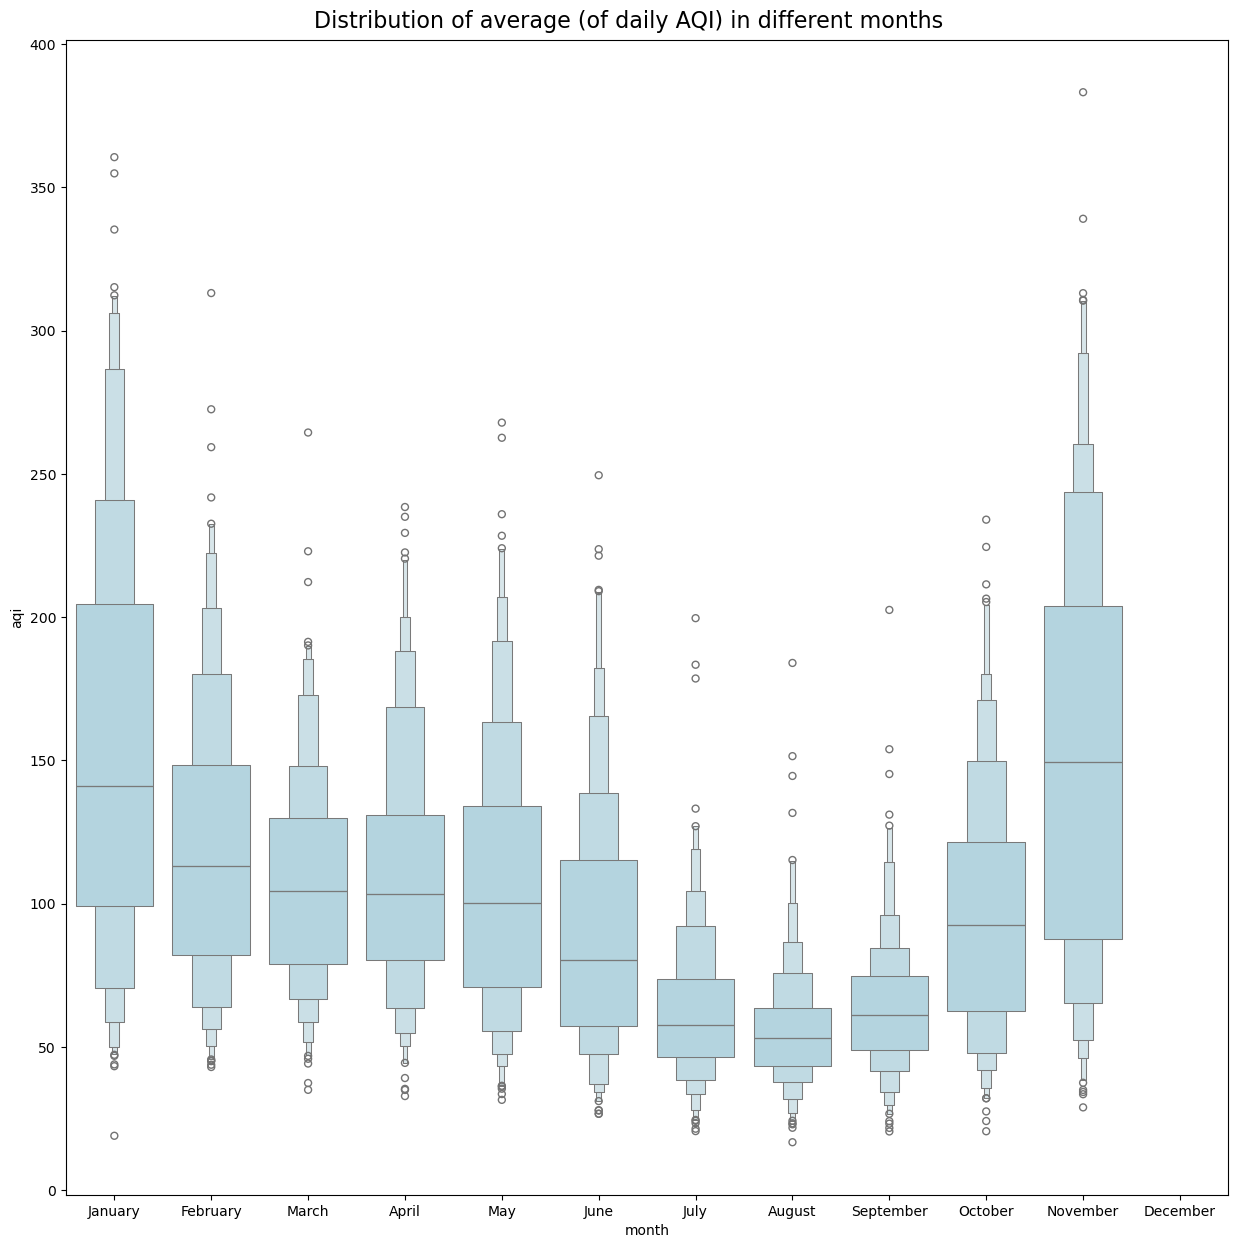

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.boxenplot(data=df_monthly, x="month", y="aqi", color="lightblue")
fig.suptitle("Distribution of average (of daily AQI) in different months", fontsize=16, y=0.9)
plt.show()

# State Level 

## Dataframe

The data is grouped by State to aggregate various city-level metrics into state-level values. For state level metrics (constant across cities within a state) the first value is used since it remains the same for all rows in that state.
For city level metrics, such as temperature, pressure, humidity, wind, precipitation, clouds, sunshine, AQI, and missing AQI proportions, the mean is calculated across all cities within the state. This gives a representative average for the state. This is done with the assumption that the cities are close to each other and the states are not very large, as a result and average will accurately represent the states value for that variable.

In [36]:
# Aggregating relevant state-level data
state_level_df = dataset.groupby('State').agg({
    'State Population': 'first',  # State population is the same for all cities in a state
    'State Area (sq. km)': 'first',
    'Forest Area(sq. km in state)': 'first',
    'Registered Vehicles in State': 'first',
    'Farming Area (sq. km in state)': 'first',
    'Farmers (in state)': 'first',
    'Factories (in state)': 'first',
    'Shipping Cargo Volume ( million metric tons in state)': 'first',
    'Coal Capacity (Max Electricity ouput in MW)': 'first',  
    'Gas Capacity (Max Electricity ouput in MW)': 'first',
    'Temperature': 'mean',  #average temperature across the cities
    'Pressure': 'mean',
    'Humidity': 'mean',
    'Wind': 'mean',
    'Precipitation': 'mean',
    'Clouds': 'mean',
    'Sunshine': 'mean',
    'aqi': 'mean',  # Average AQI across cities in the state
    'missing_aqi': 'mean'  # Average of missing AQI proportions
}).reset_index()

# Define AQI categories and corresponding labels
aqi_bins = [0, 50, 100, 200, 300, 400, 500]
aqi_labels = ["Good", "Satisfactory", "Moderate", "Poor", "Very Poor", "Severe"]

# Add the AQI_Category column with categorical data type
state_level_df['AQI Category'] = pd.cut(
    state_level_df['aqi'], 
    bins=aqi_bins, 
    labels=aqi_labels, 
    include_lowest=True
)

# Convert AQI_Category to a categorical data type with ordered categories
state_level_df['AQI Category'] = pd.Categorical(
    state_level_df['AQI Category'], 
    categories=aqi_labels, 
    ordered=True
)

state_level_df[0:5]

,State,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in State,Farming Area (sq. km in state),Farmers (in state),Factories (in state),Shipping Cargo Volume ( million metric tons in state),Coal Capacity (Max Electricity ouput in MW),...,Temperature,Pressure,Humidity,Wind,Precipitation,Clouds,Sunshine,aqi,missing_aqi,AQI Category
0,andhra pradesh,53402000.0000,162968.0000,29784.0000,13108491.0000,351.3000,16967754.0000,0.0000,175.1800,11275.0000,...,296.4162,1007.4925,72.7588,2.3887,0.0100,27.7300,126.5175,108.4281,0.1734,Moderate
1,arunachal pradesh,1580000.0000,83743.0000,66431.0000,230126.0000,35.4000,36171.0000,0.0000,0.0000,0.0000,...,288.9000,1011.1500,71.4900,1.4200,0.0200,32.0700,98.9200,89.4545,0.2903,Satisfactory
2,assam,36159000.0000,78438.0000,28312.0000,4358529.0000,350.5000,1845346.0000,6425.0000,0.0000,0.0000,...,289.9200,1012.1340,76.7240,1.4320,0.0240,31.8920,116.0460,189.8570,0.0860,Moderate
3,bihar,129205000.0000,94163.0000,7381.0000,9903889.0000,546.3000,18345649.0000,6345.0000,0.0000,10040.0000,...,288.8370,1017.3165,69.3735,2.2930,0.1685,23.5420,190.7840,227.3722,0.1029,Poor
4,chandigarh,1247000.0000,114.0000,22.8800,1058857.0000,127.4000,1687.0000,423.0000,0.0000,0.0000,...,285.6200,998.6900,67.1200,2.3000,0.0400,26.4000,196.9200,289.2258,0.0000,Poor


In [37]:
na_counts = state_level_df.isna().sum()
print(na_counts)

State                                                    0
State Population                                         0
State Area (sq. km)                                      0
Forest Area(sq. km in state)                             0
Registered Vehicles in State                             0
Farming Area (sq. km in state)                           0
Farmers (in state)                                       0
Factories (in state)                                     0
Shipping Cargo Volume ( million metric tons in state)    0
Coal Capacity (Max Electricity ouput in MW)              0
Gas Capacity (Max Electricity ouput in MW)               0
Temperature                                              0
Pressure                                                 0
Humidity                                                 0
Wind                                                     0
Precipitation                                            0
Clouds                                                  

## Data Visualisation: State Level

Because obtaining the full data for all the cities was impossible we also decided to do the analysis at the state level.
The following plots show the AQI for all the different states - this is obtained via a simple average across all cities in a state - and we can see that there are 
large differences across states. The most polluted state is Dehli, a small state that contains the city.

Because there are large differences within states, we will also try to do our analysis at a city level even if we don't have all the data for all the cities.
There are large and remarkable differences in the variance across states. Bihar has some very polluted cities and some very clean ones. While a state like Karnataka has very small variance across many cities and very good air quality overall.


In [38]:
barplot_data = df_jan_plot.groupby("state")["aqi"].mean().sort_values(ascending=False)[:-1]

In [39]:
# for following plots
order = barplot_data.index.tolist()

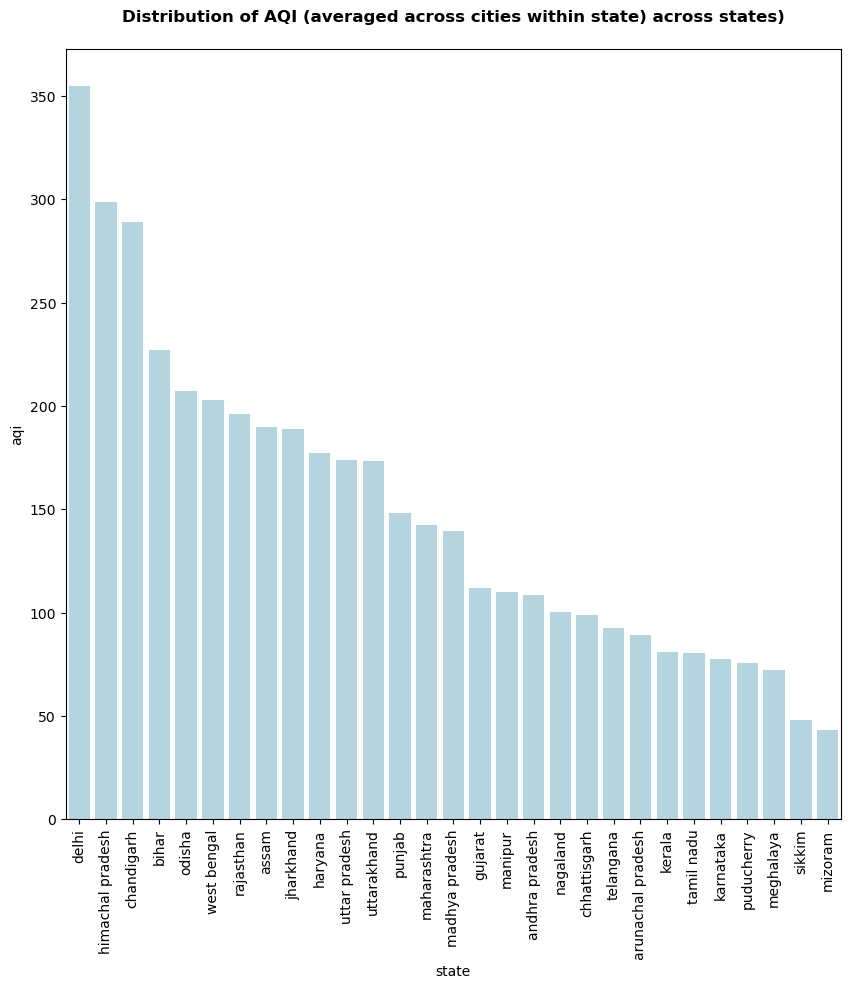

In [40]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.barplot(barplot_data,order=order, color = "lightblue")
plt.xticks(rotation=90)
plt.title(f"Distribution of AQI (averaged across cities within state) across states)",fontsize=12, fontweight='bold', pad=20)

plt.show()

From the correlation matrix below we see the following:

Positive Correlations:

AQI shows positive correlation with variables like Registered Vehicles and Factories, which are common sources of air pollution. \
State Population and Registered Vehicles in State show high correlation, indicating that states with larger populations tend to have more registered vehicles. \
Factories and Shipping Cargo Volume show positive correlation, suggesting that industrial activity is linked to transportation of goods. \
Coal and Gas Capacity are correlated, as states with higher energy demands often utilize both sources of energy.

Negative Correlations:

Humidity and Sunshine are negatively correlated, as areas with higher humidity tend to receive less direct sunlight. \
AQI and Forest Area are negatively correlated, indicating that more forested areas tend to have lower AQI. \
AQI shows negative correlation with Precipitation, showing natural factors can improve air quality. 

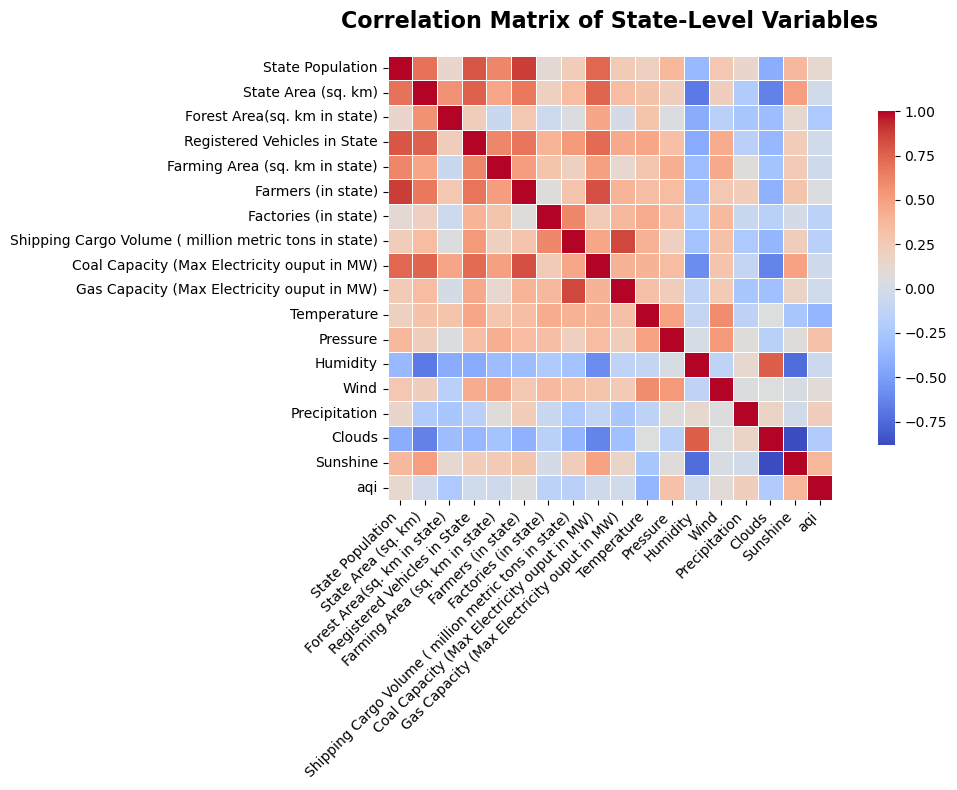

In [41]:
correlation_df = state_level_df.drop(columns=['missing_aqi', 'State','AQI Category'])

# Compute the correlation matrix
corr_matrix = correlation_df.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix,        
    cmap="coolwarm",   
    linewidths=0.5,    
    square=True,       
    cbar_kws={"shrink": 0.75}  
)

plt.title("Correlation Matrix of State-Level Variables", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

plt.show()

To show the population, forest area, registered vehicles, farmers, factories, cargo shipping volume, coal and gas capacity, we create maps of India, where each state can get a different colour based on the value for the factor. To create these maps, we need the polygon shapes of all the states. We obtained these from an open GitHub repository (Princenihith, 2020). To create the maps, we work with the geopandas python package. Below, the shape data for each state is obtained from the GitHub repository, and connected with the factor data acquired before. 

In [42]:
map_df = geopandas.read_file("DATA_INDIA/weather/Maps_with_python-master/india-polygon.shp")
map_df["st_nm"] = map_df["st_nm"].str.lower()
map_df = map_df.rename(columns={"st_nm":"State"})
map_df[0:5]

,id,State,geometry
0,None,andaman and nicobar islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,arunachal pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.3764,..."
4,None,chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [43]:
map_df = map_df.set_index('State').join(state_level_df.set_index("State"))

In [44]:
map_df.Temperature = map_df.Temperature - 273.15

In [45]:
map_df.columns

Index(['id', 'geometry', 'State Population', 'State Area (sq. km)',
       'Forest Area(sq. km in state)', 'Registered Vehicles in State',
       'Farming Area (sq. km in state)', 'Farmers (in state)',
       'Factories (in state)',
       'Shipping Cargo Volume ( million metric tons in state)',
       'Coal Capacity (Max Electricity ouput in MW)',
       'Gas Capacity (Max Electricity ouput in MW)', 'Temperature', 'Pressure',
       'Humidity', 'Wind', 'Precipitation', 'Clouds', 'Sunshine', 'aqi',
       'missing_aqi', 'AQI Category'],
      dtype='object')

Text(0.5, 1.0, 'Maps of state level data of eight economic factors for 29 States in India')

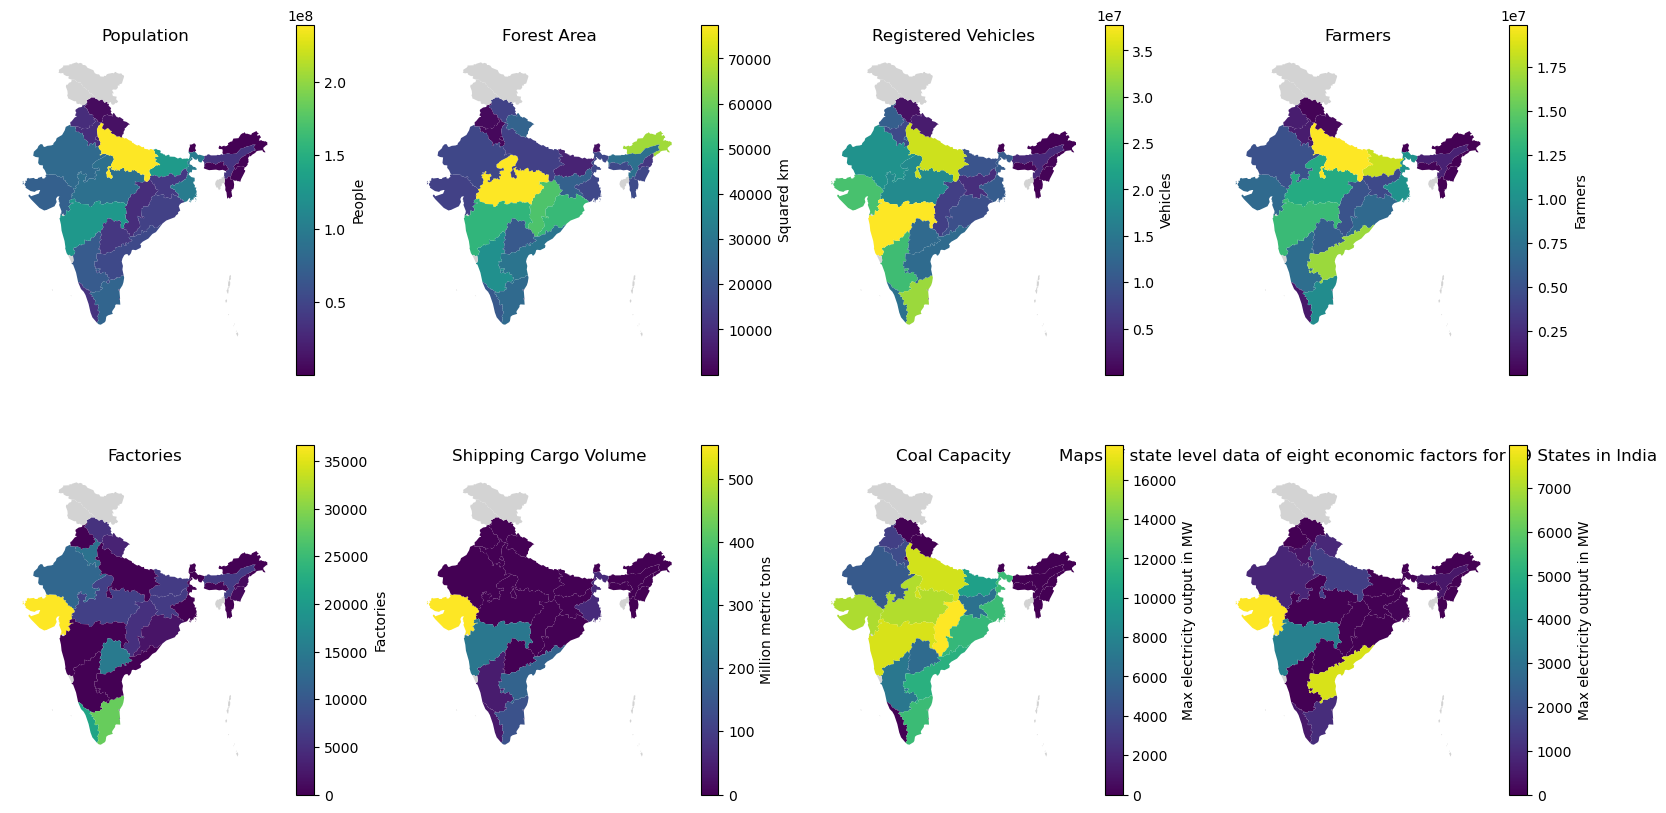

In [46]:
fig, axs = plt.subplots(2,4,figsize=(20,10))
map_df.plot(column="State Population", ax=axs[0,0], missing_kwds=dict(color='lightgrey'),legend = True, legend_kwds={"label": "People"})
axs[0,0].set_title("Population", fontsize=12)
axs[0,0].axis('off')

map_df.plot(column="Forest Area(sq. km in state)", ax=axs[0,1], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Squared km"})
axs[0,1].set_title("Forest Area", fontsize=12)
axs[0,1].axis('off')

map_df.plot(column="Registered Vehicles in State", ax=axs[0,2], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Vehicles"})
axs[0,2].set_title("Registered Vehicles", fontsize=12)
axs[0,2].axis('off')

map_df.plot(column="Farmers (in state)", ax=axs[0,3], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Farmers"})
axs[0,3].set_title("Farmers", fontsize=12)
axs[0,3].axis('off')

map_df.plot(column="Factories (in state)", ax=axs[1,0], missing_kwds=dict(color='lightgrey'),  legend = True, legend_kwds={"label": "Factories"})
axs[1,0].set_title("Factories", fontsize=12)
axs[1,0].axis('off')

map_df.plot(column="Shipping Cargo Volume ( million metric tons in state)", ax=axs[1,1], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Million metric tons"})
axs[1,1].set_title("Shipping Cargo Volume", fontsize=12)
axs[1,1].axis('off')

map_df.plot(column="Coal Capacity (Max Electricity ouput in MW)", ax=axs[1,2], missing_kwds=dict(color='lightgrey'), legend = True, legend_kwds={"label": "Max electricity output in MW"})
axs[1,2].set_title("Coal Capacity", fontsize=12)
axs[1,2].axis('off')

map_df.plot(column="Gas Capacity (Max Electricity ouput in MW)", ax=axs[1,3], legend = True, legend_kwds={"label": "Max electricity output in MW"}, missing_kwds=dict(color='lightgrey'))
axs[1,3].set_title("Gas Capacity", fontsize=12)
axs[1,3].axis('off')

plt.title("Maps of state level data of eight economic factors for 29 States in India")

The plots above show the levels for these economic variables in each of the states. We can observe some interesting patterns from these graphs. Looking at the population, we see that the colours in most states are quite identical, indicating similar population sizes. However, one northern state has a considerable higher population, indicated by the yellow colour. For forest area, we see that the northern states have lower amounts of forest area than the southern states, which have brighter colours indicating higher values and thus more forest in the state. For the amount of registered vehicles, we observe that in the eastern states, the number of vehicles seems to be lower than in the western states. For the farmer data, no clear geographical pattern can be observed, as the data varies quite substantially across the whole country. For the factory data, the scale seems a bit skewed by the few states with more than 20,000 factories. However, even though many states have relatively dark colours, these still indicate a couple of hundreds or thoudands factories, reflecting the industrial economy in the country. The shipping cargo volume graph shows strong geographical patterns. For a state to ship cargo over sea, it needs to be connected to the sea. Therefore, many states without a direct sea connection have a 0 for shipping cargo volume. On the other hand, many states with sea connections have high cargo volumes, again reflecting the industrial economy. Finally, for the coal and gas capacity, we see that the coal capacity varies substantially across the country. Many states in the middle have relatively high coal capacities, while the coal capacity on the eastern coast seems to be slightly lower. The electricity output from gas on the other hand seems to be a bit lower in most states, with two or three peak states coloured in yellow and green. 

The above plots reflected the economic factors. To reflect the weather factors, we create an interactive plot, where you can select the weather factor through the dropdown menu. You can also select the aqi index in this menu. This map was again created using geopandas. 

In [47]:
# To visualize the interactive plots you need to run the notebook, they will not be visible from github.

map_df.explore(
    column="Temperature",  
    scheme="FisherJenks",  
    legend=True,  
    k=6,
    popup = ["State","aqi","Temperature","Pressure","Humidity","Wind","Sunshine"],
    #style_kwds=dict(color="black",weight=1, opacity=0.4, fillOpacity=.7),
    tooltip=False,  # hide tooltip
           )

As can be seen in the plot above, once the corresponding variable is selected, is that there are again some interesting geographical patterns to observe. For the AQI, we observe the geographical pattern that the AQI values are higher in the north than in the south of India. For the temperature, we see thay the temperature is higher in the south of India, and lower in the north of India. For pressure, no clear geographical patterns can be observed. At the east coast and in the north, the pressures seem to be slightly higher than in the west, but then on the west coast there is again one state with relatively high pressure. For humidity, we observe that the west of India has relatively lower values of humidity. The north and the east coast have higher values of humidity. For the wind, we see that the wind pace is relatively low in the nort east. Additionally, some states in the west and south seem to have higher wind speeds, indicating stronger wind. Finally, for sunshine, we observe that the north of India obtains considerable more sunshine hours than the south, except for the states in the north east. These latter states also have relatively low amounts of sunshine. 

# City Level

## Dataframe:

We drop the registered vehicles in a city,we only have 30 observations which is not enough for models that can't handle missing values.
We haven't got population data for 130 cities. It turns out it is does not seem to be correlated with the AQI as can be seen in the first plot below. We can then more or less claim we have a random sample. And that our results are applicable to the original sample.
We then drop cities with missing population for models that can't handle missing values. This leaves us with 136 cities for our final city level analysis.

Why is it important to do some analysis at a city level? As you can see in the final plot in this section, there are large differences in AQI across different states. For some states, like Bihar, the differences range from 150 to 350 AQI, that is from acceptable AQI to very unhealthy AQI. For some other states, like Karnataka, the differences are really small, which could mean that aggregating at a state level is not too bad. However the AQI for those cities may all be low but their characteristics different, then the fact that they have similar  AQI would prove very informative. 


In [48]:
# We only have registered number of cars for 30 cities that is not enough.
city_level_df = dataset.drop(columns=["Registered Vehicles in City"])

In [49]:
# Check if population is missing at random
city_level_df["Missing population"] = city_level_df["City Population"].isna()

# Missing population data and aqi seem to be uncorrelated.
df_plot_missing_pop = city_level_df[["aqi","State","Missing population"]]
df_plot_missing_pop[["aqi","Missing population"]].corr()

,aqi,Missing population
aqi,1.0000,-0.0272
Missing population,-0.0272,1.0000


In [50]:
city_level_df = city_level_df.dropna(subset=["City Population"])

# When we drop cities with missing population values we see that only 6 weather observations are not there.
na_counts = city_level_df.isna().sum()
print(na_counts)

State                                                    0
City                                                     0
City Population                                          0
State Population                                         0
State Area (sq. km)                                      0
Forest Area(sq. km in state)                             0
Registered Vehicles in State                             0
Farming Area (sq. km in state)                           0
Farmers (in state)                                       0
Factories (in state)                                     0
Shipping Cargo Volume ( million metric tons in state)    0
Temperature                                              0
Pressure                                                 0
Humidity                                                 0
Wind                                                     0
Precipitation                                            0
Clouds                                                  

In [51]:
city_level_df[0:5]

,State,City,City Population,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in State,Farming Area (sq. km in state),Farmers (in state),Factories (in state),...,Wind,Precipitation,Clouds,Sunshine,Coal Capacity (Max Electricity ouput in MW),Gas Capacity (Max Electricity ouput in MW),aqi,missing_aqi,AQI Category,Missing population
0,uttar pradesh,agra,1430055,238875000.0000,240928.0000,14818.0000,34924824.0000,685.6000,19939223.0000,0.0000,...,2.2300,0.0100,14.8800,241.6200,16608.0000,1469.0000,121.2581,0.0000,Moderate,False
1,gujarat,ahmedabad,3719710,72653000.0000,196244.0000,14926.0000,26836981.0000,518.3000,6839415.0000,36727.0000,...,2.4300,0.0000,9.5100,252.5400,15592.0000,7990.7200,133.4839,0.0000,Moderate,False
2,mizoram,aizawl,265331,1252000.0000,21081.0000,17820.0000,267350.0000,71.0000,41787.0000,4.0000,...,1.0700,0.0200,23.9200,172.6200,0.0000,0.0000,43.2759,0.0645,Good,False
3,rajasthan,ajmer,517911,82188000.0000,342239.0000,16655.0000,19236010.0000,537.4000,4939664.0000,12169.0000,...,2.2900,0.0100,11.3700,265.9200,4955.0000,856.8000,111.7742,0.0000,Moderate,False
4,maharashtra,akola,428857,127684000.0000,307713.0000,50798.0000,37786256.0000,536.2000,13486140.0000,0.0000,...,2.2900,0.0100,15.3200,243.0000,16750.0000,3460.0000,135.1935,0.0000,Moderate,False


## Data Visualisation: City Level

As mentioned above, the first plot below show that the population is missing more or less randomly with respect to the AQI. 

The second plot highlights the importance of doing a city level analysis, as there exist large intra state differences.

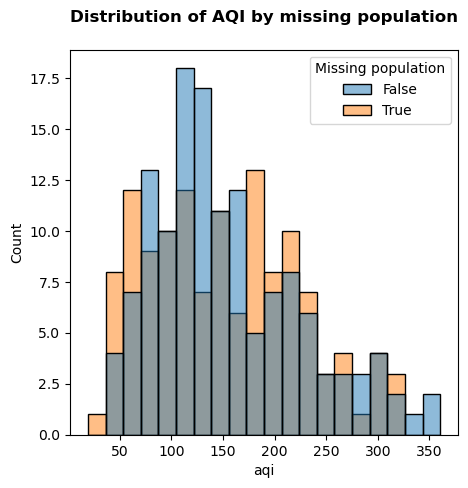

In [52]:
# Add all the stuff to this plot that is missing right now.
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.histplot(data=df_plot_missing_pop, x="aqi", hue = "Missing population",bins=20)
plt.title(f"Distribution of AQI by missing population",fontsize=12, fontweight='bold', pad=20)
plt.show()

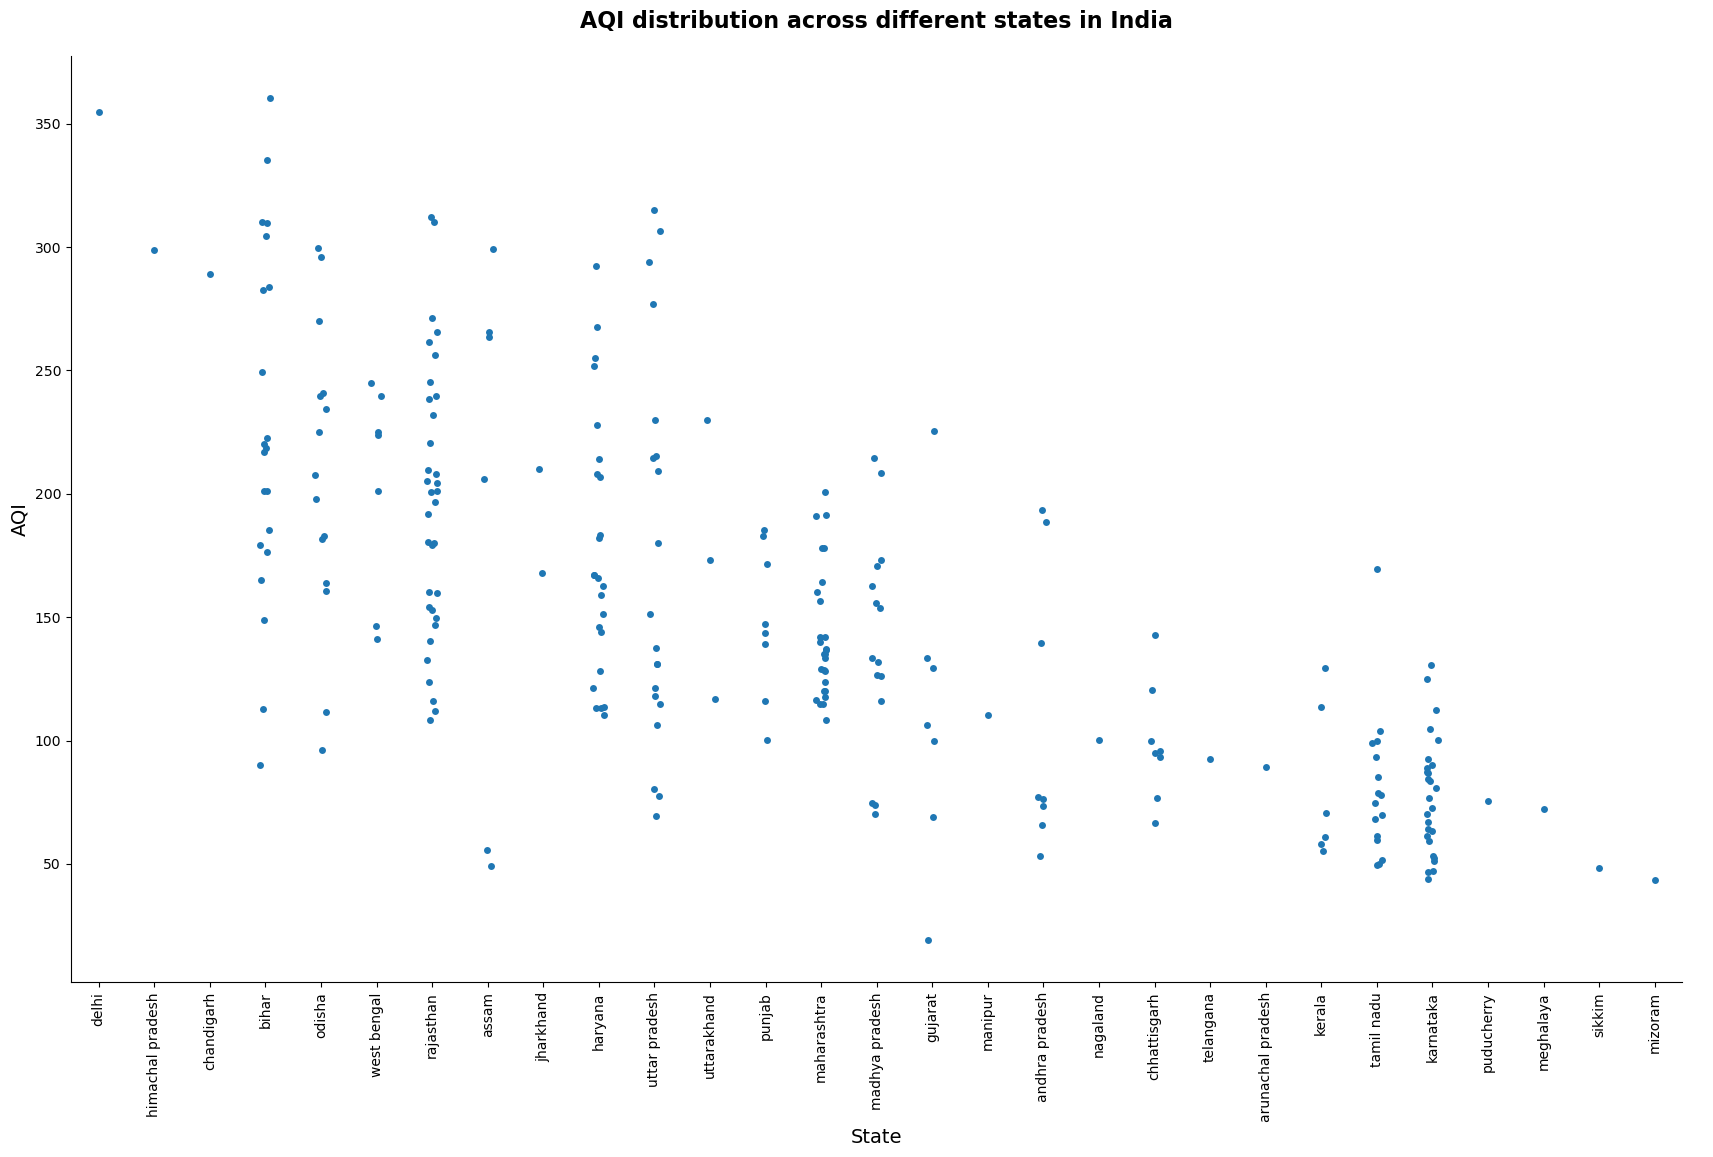

In [53]:
state_catplot = sns.catplot(data=df_jan_plot, x="state", y="aqi",height=10,aspect=1.7, order=order)
state_catplot.set_xticklabels(rotation=90)
state_catplot.set_axis_labels("State", "AQI", fontsize=14)
plt.title(f"AQI distribution across different states in India",fontsize=16, fontweight='bold', pad=20)
plt.show()

In [54]:
df_weather = pd.read_csv("DATA_INDIA/weather/jan_2024_weather_all_states.csv")

df_weather = df_weather[["City","Latitude","Longitude"]]

city_level_df = city_level_df.merge(df_weather,on="City",how="inner")

city_level_df.Temperature = city_level_df.Temperature - 273.15

gdf = geopandas.GeoDataFrame(
    city_level_df, geometry=geopandas.points_from_xy(city_level_df.Longitude, city_level_df.Latitude), crs="EPSG:4326"
)

### AQI interactive plot at city level:

As you can see pollution levels are particularly extreme in the north, the northwest surrouding Dehli and the northeast have a significant number of cities with pollution levels over 300.

*Technical notes:* If u click on any city you will obtain information of the city name population and weather data. The colour palette is not super intuitive but it was chosen because some traditional heat colour palettes where very transparent for low AQI.

In [55]:
gdf.explore(column="aqi",  
    scheme="FisherJenks",  
    legend=True,  
    k=6,
    popup = ["City","aqi","City Population","Temperature","Pressure","Humidity","Wind","Precipitation","Sunshine"],
    cmap = "cool",
    #style_kwds=dict(color="black",weight=1, opacity=0.4, fillOpacity=.7),
    tooltip=False,  # hide tooltip
           )

# Statistical Modelling: State Level

## K-Means Clustering

KMeans is an unsupervised machine learning algorithm that groups data into clusters based on similarity. It minimizes the distance between data points within a cluster while maximizing the distance between different clusters. The number of clusters (k) is pre-defined, and the algorithm assigns each data point to the nearest cluster centroid.

KMeans can help identify natural clusters in the data, revealing whether AQI levels form distinct groupings based on the given features. If the clusters align with the AQI categories, it can suggest that the featuresin the dataset are strongly linked to AQI. 

There are 6 AQI categories defined by the government, but the dataset only contains data for 5 categories (as indicated in the right graph). This is why the KMeans algorithm also formed 5 clusters instead of 6 below. From the graphs we can see that the clustering performed by KMeans (left graph) is not completely consistent with the actual AQI categories (right graph). For example, the 4 data points in the top-right corner (points where AQI > 1.2 in the feature space) are assigned different cluster colors in the KMeans graph. However, in the actual AQI category graph, these same points are all classified as belonging to the same category (e.g., "Good" or "Satisfactory").

Therefore, as the clustering was not accurate, it indicates that the dataset may lack some important variables or that AQI levels are influenced by more complex interactions.

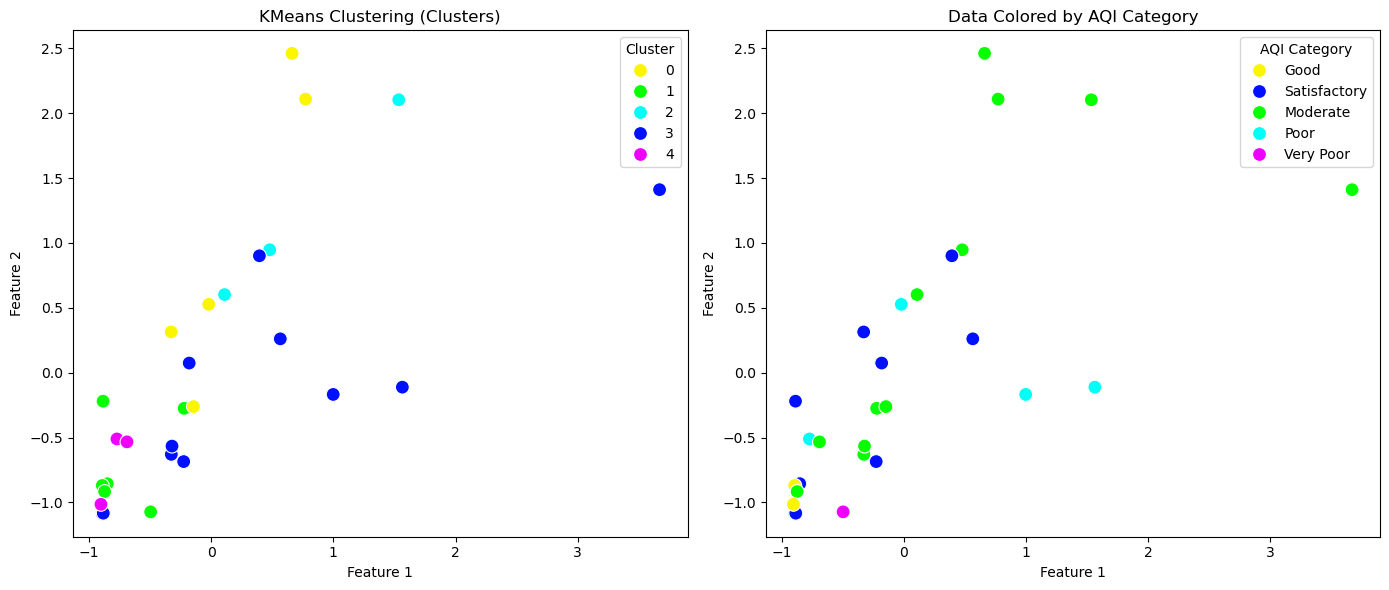

In [56]:
# State is the data number and aqi and missing aqi is the dependent variable, 
# both of these are not considered while clustering
dataset_cluster = state_level_df.drop(columns=['State', 'aqi', 'missing_aqi'], errors='ignore')
dataset_cluster = dataset_cluster.dropna()

# if there are categories not in the data drop them from the category number 
# as the data should be clustered only into the number of categories present in the data
if dataset_cluster['AQI Category'].dtype.name == 'category':
     dataset_cluster['AQI Category'] = dataset_cluster['AQI Category'].cat.remove_unused_categories()

features = dataset_cluster.drop(columns=['AQI Category'], errors='ignore')
aqi_category = dataset_cluster['AQI Category']

num_clusters = aqi_category.nunique()

# standardize the features 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans with number of clusters = number of aqi categories in data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
dataset_cluster['Cluster'] = kmeans.fit_predict(scaled_features)

# color palette 
unique_aqi_categories = sorted(aqi_category.unique())
palette = sns.color_palette("hsv", len(unique_aqi_categories))

# AQI categories and colors
aqi_color_map = dict(zip(unique_aqi_categories, palette))

# clusters and same colours
cluster_color_map = {i: palette[i] for i in range(num_clusters)}

plt.figure(figsize=(14, 6))

# KMeans 
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=dataset_cluster['Cluster'],
    palette=cluster_color_map,
    legend='full',
    s = 100
)
plt.title("KMeans Clustering (Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# AQI Category
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=aqi_category,
    palette=aqi_color_map,
    legend='full',
    s = 100
)
plt.title("Data Colored by AQI Category")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

A dissimilarity matrix represents the distances (or dissimilarities) between each pair of data points in the dataset. Blue blocks in the heatmap represent clusters where data points within the same cluster are more similar to each other, while red blocks show data points between different clusters are more dissimilar. 

From the plot below we can see that the original dissimilarity matrix shows the raw dissimilarities between all data points without any clustering applied. The pattern is scattered, with no clear groupings or blocks visible. The right matrix shows some grouping compared to the left, suggesting that the clustering algorithm grouped some similar data points together.
The blue blocks along the diagonal highlight the within-cluster similarity and the red regions between the blocks represent high dissimilarity between clusters, reinforcing the separation of clusters. However as the blue blocks are not very defined and there is no clear seperation between the blocks with red regions, we can say that the clustering algorithm has not been very effective. This may be due to the overlapping of the clusters as there aren't clear blue blocks. Additionally it can also be that the features used for clustering may not adequately capture the differences between data points or the dataset may have too many irrelevant features. 

Therfore from KMeans clustering results we can conclude that even though the dataset consists of some important features that can perform basic clustering it cannot fully explain the AQI levels.It does not consist of all the relevant fetaures and the AQI levels may be associated with more complex interactions that have not been accounted for here. 

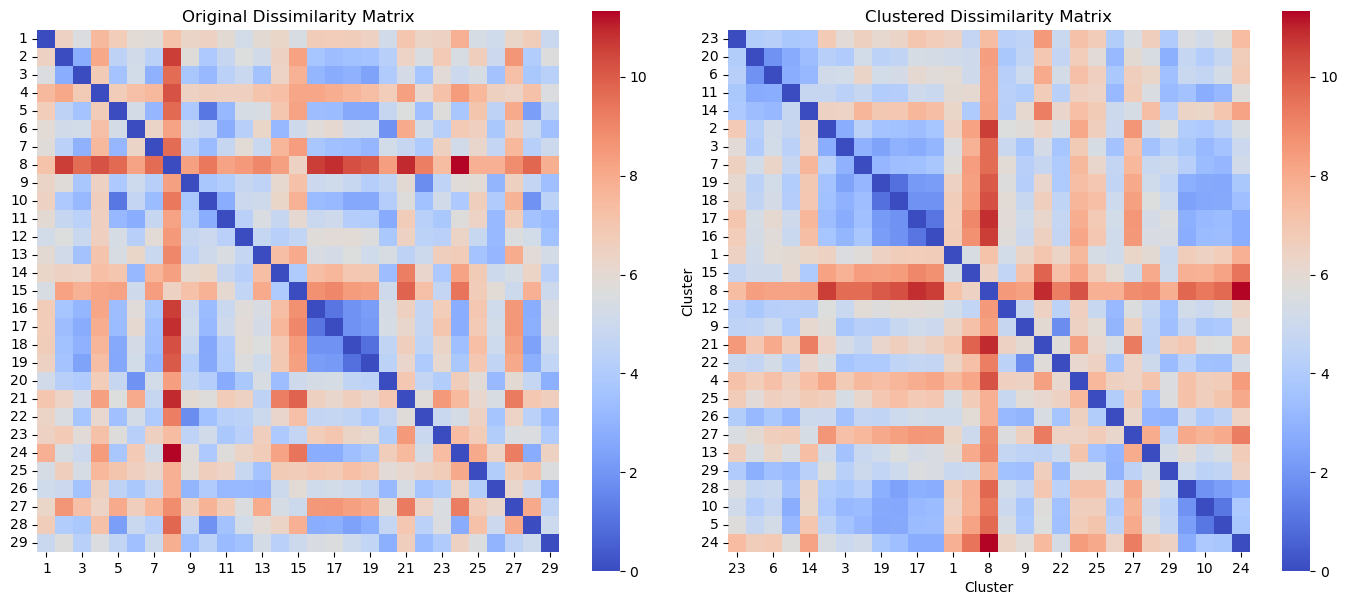

In [57]:
# Compute the pairwise dissimilarity matrix (Euclidean distances)
dissimilarity_matrix = squareform(pdist(scaled_features, metric='euclidean'))

# Rearrange the dissimilarity matrix by clusters
sorted_indices = np.argsort(dataset_cluster['Cluster'])  # Sort indices by cluster
sorted_dissimilarity_matrix = dissimilarity_matrix[sorted_indices][:, sorted_indices]

# Convert matrices to DataFrames for better visualization
original_df = pd.DataFrame(
    dissimilarity_matrix,
    columns=range(1, len(scaled_features) + 1),
    index=range(1, len(scaled_features) + 1),
)

clustered_df = pd.DataFrame(
    sorted_dissimilarity_matrix,
    columns=sorted_indices + 1,
    index=sorted_indices + 1,
)

plt.figure(figsize=(14, 6))

# Plot 1: Original dissimilarity matrix
plt.subplot(1, 2, 1)
sns.heatmap(original_df, cmap='coolwarm', cbar=True, square=True)
plt.title("Original Dissimilarity Matrix")

# Plot 2: Clustered dissimilarity matrix
plt.subplot(1, 2, 2)
sns.heatmap(clustered_df, cmap='coolwarm', cbar=True, square=True)
plt.title("Clustered Dissimilarity Matrix")

plt.tight_layout()
plt.show()

## Lasso:

For our state level analysis we end have 29 observations and 17 features. 
We use Lasso as a model that automatically conducts feature selection. Lasso models have a hyperparameter (alpha) which controls the strength of the penalization, because we don't want to train an optimal model we train many different models and see if the parameter signs remain consistent across different alphas. Before we training the models we standarize as it is best practice.

Our coefficient signs stay pretty consistent across our analysis. In particular it seems that atmospheric factors are very important to predict the differences in AQI. Pressure and sunshine are positively correlated with AQI while temperature and humidity are negatively correlated with AQI.

There are some other more human factors, number of registered cars is positively correlated with AQI, while farming surface and forest cover are negatively correlated with AQI. The farmer result is somewhat surprising, on the one hand more farmer space may interpreted as being correlated with more sparse population or other unobserved variables. On the other hand, it is thought that crop burning is partly responsible of the bad AQI levels in some cities.

In [58]:
# Drop 3 states for which we don't have weather data.

state_level_df = state_level_df.dropna()

x_names = state_level_df.columns.tolist()

# We drop the Y variable as well as the name of the state and keep the rest.
drop = ["State","AQI Category","aqi","missing_aqi"]
x_names = [name for name in x_names if name not in drop]
X = state_level_df[x_names]

# Lasso needs the variables to be standardized.
scaler = StandardScaler()

X = scaler.fit_transform(X)
y = state_level_df["aqi"]


In [60]:
def plot_lasso_r(X, y,x_names,max_penalty, norm_type='standard'):        
    rows = []

    # Runs Lasso models for a number of different penalties. Penalty 0 is just OLS.
    for penalty in np.linspace(0, max_penalty, 20):
        if penalty == 0:
            ols = LinearRegression().fit(X, y)
            rows.append(ols.coef_.tolist() + [penalty])
        else:    
            lasso = Lasso(alpha=penalty).fit(X, y)
            rows.append(lasso.coef_.tolist() + [penalty])
    
    # Create a DataFrame from the list of coefficients and penalty values
    df_coefficients = pd.DataFrame(rows, columns=x_names + ['Lasso penalty term value'])
    df_coefficients.set_index('Lasso penalty term value', inplace=True)
    
    # Get the top 5 most significant coefficients based on their absolute mean value
    col_legend = df_coefficients.abs().mean().sort_values(ascending=False)[0:5].index.to_list()

    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Plot the coefficient values for different penalties (alpha values)
    df_coefficients.plot(ax=ax, use_index=True, legend=False)

    # Create custom lines for the legend based on the selected columns (top 5 by mean absolute value)
    line_mapping = {col: line for col, line in zip(df_coefficients.columns, ax.get_lines())}
    columns_to_include = col_legend
    custom_lines = [line_mapping[col] for col in columns_to_include]
    ax.legend(custom_lines, columns_to_include)
    
    plt.title(f"Coefficient values at different Lasso penalties (alpha) for AQI across states")
    plt.show()

    # Return average of coefficients across different models.
    return df_coefficients.mean().sort_values(ascending=False)     

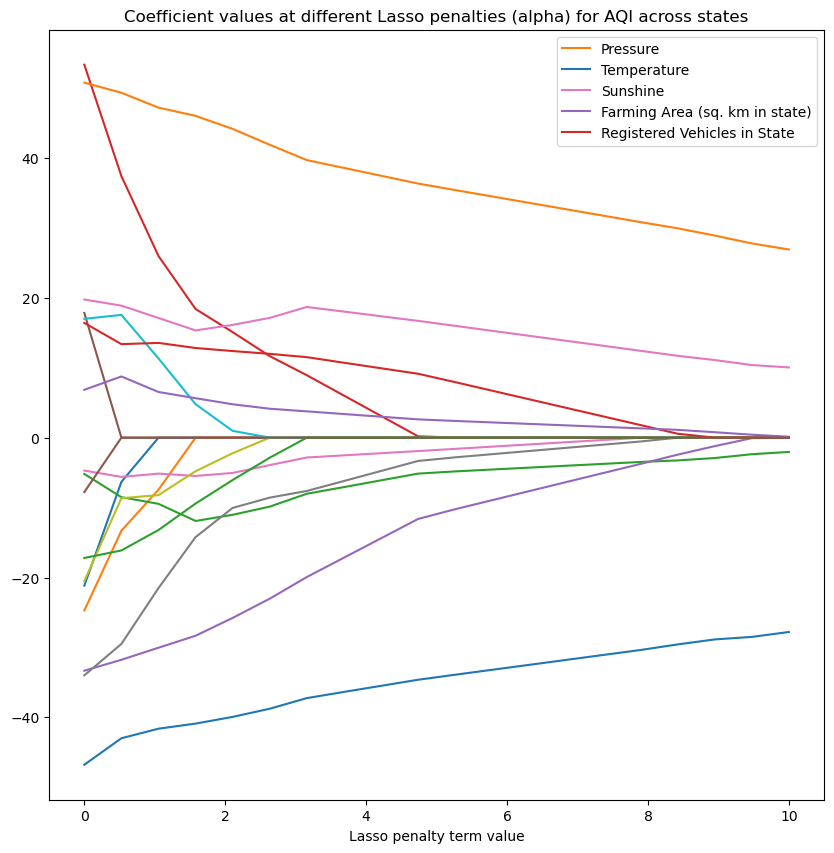

Pressure                                                 37.1842
Sunshine                                                 15.1806
Registered Vehicles in State                              9.0066
Wind                                                      7.5810
Precipitation                                             3.1531
Gas Capacity (Max Electricity ouput in MW)                2.5823
Farmers (in state)                                        0.8919
Clouds                                                   -0.3889
State Population                                         -1.3740
Factories (in state)                                     -2.2131
Coal Capacity (Max Electricity ouput in MW)              -2.2208
State Area (sq. km)                                      -2.2727
Humidity                                                 -3.2447
Forest Area(sq. km in state)                             -5.8898
Shipping Cargo Volume ( million metric tons in state)    -7.4931
Farming Area (sq. km in s

In [61]:
plot_lasso_r(X,y,x_names,10)

# The table of coefficients is the average value of the coefficients across all different models.

# Statistical Modelling: City Level

At a city level we have more observations. Unfortunately India hasn't conducted an official census sine 2010 so the population data was not easy to find. We drop the 100 cities and conduct our analysis. We first conduct very similar Lasso analysis and then use a random forest.


In [62]:
city_level_df[0:5]

,State,City,City Population,State Population,State Area (sq. km),Forest Area(sq. km in state),Registered Vehicles in State,Farming Area (sq. km in state),Farmers (in state),Factories (in state),...,Clouds,Sunshine,Coal Capacity (Max Electricity ouput in MW),Gas Capacity (Max Electricity ouput in MW),aqi,missing_aqi,AQI Category,Missing population,Latitude,Longitude
0,uttar pradesh,agra,1430055,238875000.0000,240928.0000,14818.0000,34924824.0000,685.6000,19939223.0000,0.0000,...,14.8800,241.6200,16608.0000,1469.0000,121.2581,0.0000,Moderate,False,27.1753,78.0098
1,gujarat,ahmedabad,3719710,72653000.0000,196244.0000,14926.0000,26836981.0000,518.3000,6839415.0000,36727.0000,...,9.5100,252.5400,15592.0000,7990.7200,133.4839,0.0000,Moderate,False,23.0216,72.5797
2,mizoram,aizawl,265331,1252000.0000,21081.0000,17820.0000,267350.0000,71.0000,41787.0000,4.0000,...,23.9200,172.6200,0.0000,0.0000,43.2759,0.0645,Good,False,23.7435,92.7383
3,rajasthan,ajmer,517911,82188000.0000,342239.0000,16655.0000,19236010.0000,537.4000,4939664.0000,12169.0000,...,11.3700,265.9200,4955.0000,856.8000,111.7742,0.0000,Moderate,False,26.4691,74.6390
4,maharashtra,akola,428857,127684000.0000,307713.0000,50798.0000,37786256.0000,536.2000,13486140.0000,0.0000,...,15.3200,243.0000,16750.0000,3460.0000,135.1935,0.0000,Moderate,False,20.7117,77.0026


In [63]:
x_names = city_level_df.columns.tolist()

# We drop the Y variable as well as the name of the state and keep the rest.
drop = ["State","City","AQI Category","Missing population","aqi","missing_aqi","AQI Category"]
x_names = [name for name in x_names if name not in drop]
X = city_level_df[x_names]

In [64]:
# Lasso needs the variables to be standardized.
scaler = StandardScaler()

X = scaler.fit_transform(X)
y = city_level_df["aqi"]

## Lasso:

We use a Lasso model with the same objective as before, we have a small sample and quite a few features. We want to select the most related to AQI in an objective way. To do this we run many lasso models with different penalty terms. The main difference to before is that we now include the latitude and longitude for each city. These variables were intended to be used only for the interactive geographic plots but they are highly associated with the AQI.

As you can see below the Latitude (how north a city is) is related very strongly with a worse air quality. We view this somehow as a failure of our model. It is easy to see why the model would believe this, in the interactive plot at the city level you see higher AQI in the north. However this must be because some other factors, not because of just being more to the north. Taking this to the extreme, Nepal would have extremely bad air pollution in this model. Of course the latitude is a good predictor for our sample in India but it is not causal estimate, it is just due to the fact that we can't fully inlcude the true causes of the bad air quality index.

Below the figure we have the average lasso coefficient values across all different models.

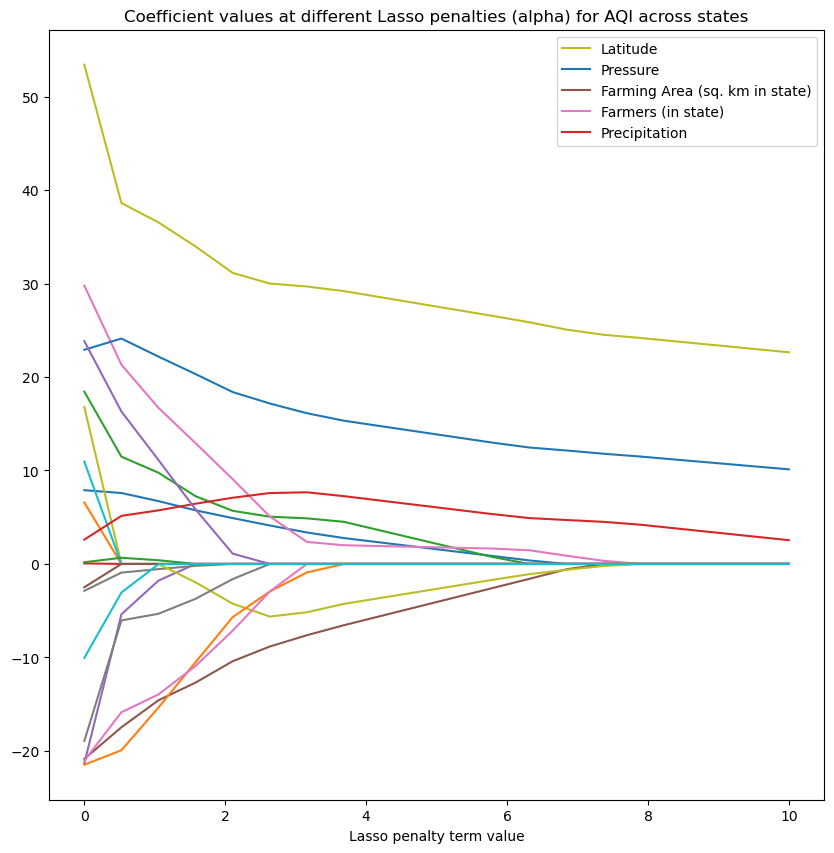

Latitude                                                29.2579
Pressure                                                15.1195
Farmers (in state)                                       5.4525
Precipitation                                            5.2354
State Area (sq. km)                                      3.7847
Clouds                                                   2.9103
City Population                                          2.4895
Temperature                                              0.5469
State Population                                         0.3287
Wind                                                     0.0622
Forest Area(sq. km in state)                             0.0030
Sunshine                                                -0.1246
Factories (in state)                                    -0.2275
Longitude                                               -0.6568
Shipping Cargo Volume ( million metric tons in state)   -0.8551
Registered Vehicles in State            

In [65]:
plot_lasso_r(X,y,x_names,10)

## Random forest and feature importance:

We wanted to see if a very nonlinear model like random forest agreed with the Lasso. We did not use it for prediction, but rather to see its variance importance plot. The importance of a feature is measured as the decrease in impurity when using a given feature for a given tree. That is, if we use latitude does the resulting two groups have very different or very similar AQI. If the two groups are similar within them we say the impurity decreased in a significant quantity.

The point estimates generally agree with the Lasso, pressure and latitude are the ones that are most associated with decreases in impurity (they are the best predictors), however, there are significant differences across the different trees. If we plot the standard deviation in feature importance across trees (they are plotted below) we can't be sure of anything. Overall we would need larger samples to make more precise inference.


This idea and implementation come from: 
https://scikit-learn.org/1.6/auto_examples/ensemble/plot_forest_importances.html

In [66]:
# impurity is in term of gini index, because we use a random forest regressor.

forest = RandomForestRegressor()
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

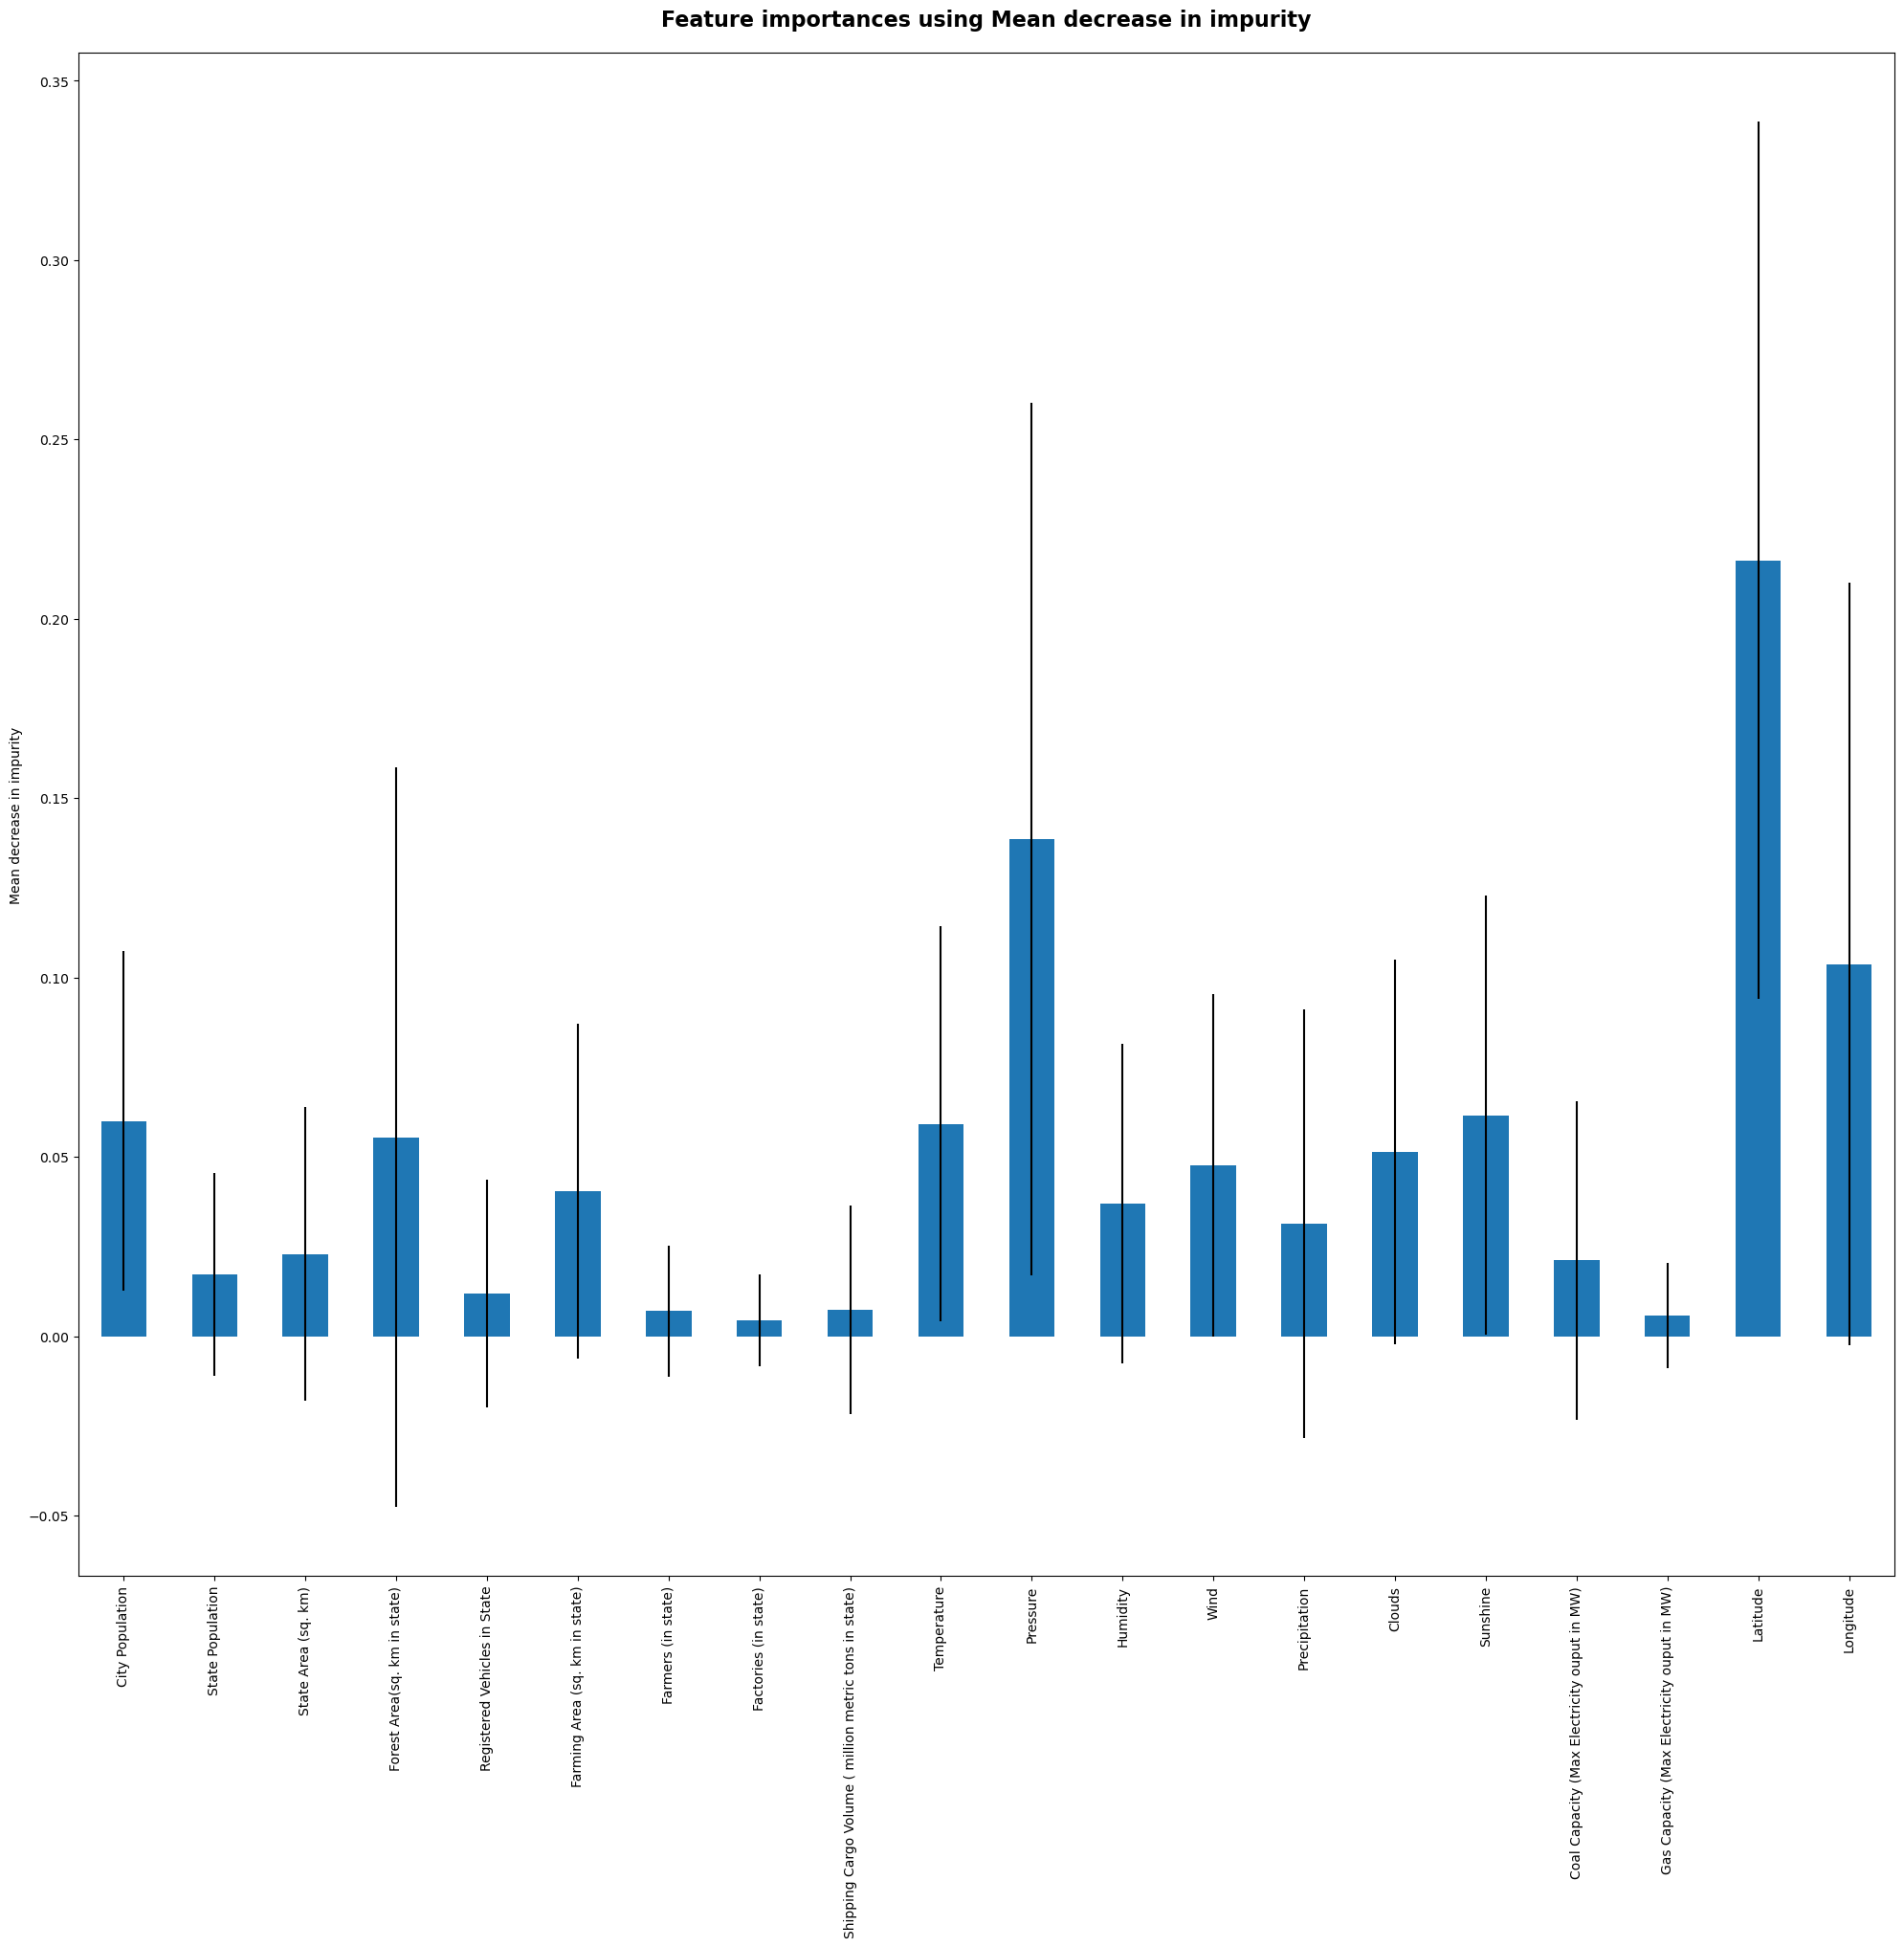

In [67]:
forest_importances = pd.Series(importances, index=x_names)

fig, ax = plt.subplots(figsize=(20,20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.title(f"Feature importances using Mean decrease in impurity",fontsize=16, fontweight='bold', pad=20)
plt.show()

# Conclusion

Air pollution is a big problem in India. The air pollution can become so high that Indians experience health complains (Yadav, 2024). Because of the severe effects of the air quality on people's health, it is important to try to improve the air quality. Not only economic factors can play a role, but also environmental factors affect the air quality. During the winter, relatively cold and stagnant weather can trap pollutants close to the ground, decreasing the air quality (Yadav, 2024).  Therefore, it is important to not just focus on economic factors, but also take environmental factors into account. Therefore, we aimed to answer the following research question in this report:

*Which economic and environmental factors are associated with the air pollution (AQI) in India on state and city level in January 2024?*

On state level, we performed a K-means clustering to cluster the states based on the five AQI categories. The graphs indicate that the clustering performed by K-means is not completely consistent with the actual AQI categories. This indicates that, based on the considered economic and environmental factors, it is difficult to clearly distinguish between the different AQI levels. Additionally, based on the dissimilarity matrices, we observe that there is some slight form of clustering possible, but still the clusters are not very clear. This can be interpreted as a potential indication that important factors associated with the AQI are missing. Using proxy data for many variables, for example for ports, and making an aggregating assumption for city data when data at state level was not available can also be potential explanations for the inconsistent clustering.

Additionally, we conduct a Lasso regression on state level. This analysis showed that the environmental factors seem to be mostly associated with the AQI. Pressure and wind are positively correlated with AQI while temperature and humidity are very negatively correlated with AQI.

Based on these results, we conclude that on state level, the environmental factors are mostly associated with the AQI. Pressure and wind are positively correlated with AQI while temperature and humidity are very negatively correlated with AQI. However, the total set of economic and environmental factors considered does not provide a consistent clustering for the AQI index when K-means clustering is used. Therefore, these results should only be interpreted as a first indication, and not too strong conclusions can be drawn based on this. 

On city level, we performed a Lasso regression. We observe that the latitude is strongly related with worse air quality. This is in line with the interactive plot, which showed higher AQI values in the north.  Pressure seems to be strongly related to the air quality as well. However, as latitude is not a economic or environmental factor, the fact that Lasso selects this location implies that the model is not able to observe this geographical pattern through other types of economic or environmental data. this can be an indication for the fact that none of our included factors are strongly associated with the air quality. We obtain similar results from our random forest analysis. Pressure and latitude are the factors that are the strongest associated with air quality. However, the factors chosen by the random forest vary across the different trees. Therefore, larger samples would be needed to make more precise inferences. 

On city level, we conclude that pressure is the factor that is strongest associated with the AQI. Additionally, we see a strong association between latitude and AQI. This indicates that there is some geographical pattern in India for the AQI, which is in line with the literature and previous observations (Clase, 2024). However, this geographical association could not be captured by any of the economic or environmental factors, except for pressure. This is also in line with our state level maps of the factors, as we did not see clear north south divisions in the maps for most factors. The performance of both Lasso and Random Forest can be influenced negatively by the small sample size. Therefore, these conclusions can only be seen as a first indication, and further research is needed to confirm the relation between pressure and air quality and to see if there are other environmental and economic factors which can explain the strong geographical difference in AQI in India in January. 

This research serves as an exploratory analysis based on publicly available data of potential economic and environmental factors associated with the air pollution in India in January. Based on our results, it would be interesting to further exploit the influence of the environmental factors. As those factors vary throughout the year, a comparison in associations with the AQI between January and other months might be a plausible next research step. Additionally, further research can try to incorporate more economic factors, to see if they are associated with the AQI, and include the effects of neighbouring states and closeby cities in the analysis, as the relative distance between the states and cities and the effects on each others air quality were not included in this research.

# Limitations

As already mentioned in our conclusion, our research has some considerable limitations. In this section, we will further touch upon these limitations. We divide this Section into two parts, one about data limitations and one about modelling limitations.

*Data Limitations*
Generally, it was quite difficult to obtain official government data on the economic factors. In India, the data collection is not very centralised yet, hence we had to rely on some external sources that had collected all data. The fact that not all data is directly obtained from governmental sources is a limitation to the validity of the data. Additionally, there is still a lot of data missing. For example, we only have population data for half of the cities. As many data was missing, this can influence the estimation processes of our models, being a potential explanation for the weak results. 

Additionally, the aggregation from city level to state level is not ideal. For some variables, such as the environmental factors, only city level data was available, hence we averaged those data to state averages. This creates additional uncertainty in the state data, as we are assuming that the cities, which are not necessarily spread out evenly over the state, reflect the state levels. Furthermore, the number of cities differs per state, and for some states we only have data for one city. Therefore, the quality of the state aggregations may differ, as some states are aggregated based on many cities, while others are aggregated based on only one city.

Finally, for variables that were collected at a state level, every city in the state has the same value. For example farming area was collected at a state level and therefore, all cities in the same state have the same farming area. This assumption was made as the necessary data was not available on city level (due to the large number of cities in India). However, the data may not reflect city differences accurately for these variables, while they might be there in reality. This implies that our data may contain less variation than in reality on city level, which may have weakened the results of our analysis. 

*Modelling*
As mentioned before, we only focused on one month, implying that the available data was limited. The limited sample size may have a negative influence on the effectiveness of both Lasso and Random Forests, which could be seen as a potential partial explanation for our weak results. 

Even though we included the longitude and latitude of the cities in the city level analysis, we did not incorporate any interactive terms reflecting the distance between cities, and the potential effect that one city's pollution could have had on another city. To model the proximity to other cities, we would need a network model, which was beyond the scope of this report.

A similar argument holds at state level, as we did not include interactive terms representing proximity between states and the fact that pollution does not stop at a state or city border. This is a limitation of our research, as the pollution of a state's neighbours can affect the air quality in the state. These interaction terms could be included in further research. 

All limitations will be addressed in further research.

# Bibliography


Clase, C. (25 November, 2024). *Global Warming Will Worsen Winter Air Pollution in Northern India.* Center for Policy Research on Energy and the Environment. https://cpree.princeton.edu/news/2024/global-warming-will-worsen-winter-air-pollution-northern-india

Clean Air Fund (n.d.). *India*. https://www.cleanairfund.org/geography/india/#:~:text=Air%20pollution%20in%20India&text=Of%20the%20world's%2030%20cities,the%20World%20Health%20Organization%20guidelines.
    
Ellis-Petersen, H. (22 November, 2024). *‘The air is killing us’: why Delhi’s pollution problem runs deeper than smog season.* The Guardian. https://www.theguardian.com/world/2024/nov/22/the-air-is-killing-us-why-delhi-india-pollution-problem-runs-deeper-than-smog-season 

UCAR Center for Science Education (n.d.). *How Weather Affects Air Quality.*https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality 

Yadav, N. (25 November, 2024). *Air pollution: Why most Indians choking on smog aren’t in Delhi.* BBC News. https://www.bbc.co.uk/news/articles/c36pr7wpn78o


# Data Sources

Agricultural department of India (2023). *Land use statistics at a glance: 2022-23*. (p.19, 21) https://desagri.gov.in/wp-content/uploads/2024/09/Final-file-of-LUS-2022-23-for-uploading.pdf 

Central Control Room for Air Quality Management (2024). *All India*. https://airquality.cpcb.gov.in/ccr/#/caaqm-dashboard-all/caaqm-landing/aqi-repository

Forest Survey India (2021). *Chapter-2: State/UT-wise Forest Cover*. (p.17-18)  https://fsi.nic.in/isfr-2021/chapter-2.pdf 

Indian Government (2020). *Cities-wise total Registered Motor Vehicles (Transport) in ... (2020)*. https://www.data.gov.in/resource/cities-wise-total-registered-motor-vehicles-transport-million-plus-cities-india-31st-march 

Labour Bureau (2020). *Report on statistics of factories 2020*. (p. 34) https://labourbureau.gov.in/uploads/pdf/FA_2020.pdf 

OpenWeather (2024). *Statistical Weather Data API* (Version 2.5). https://openweathermap.org/api/statistics-api

Princenihith (2020). *Maps_with_python*. https://github.com/Princenihith/Maps_with_python

Statista (2023). *India: Cargo Traffic Volume at ports by State 2023*. https://www.statista.com/statistics/692571/cargo-traffic-volume-at-ports-by-state-india/ 

Statistics Times (2024). *List of Indian states by population*. https://statisticstimes.com/demographics/india/indian-states-population.php 

Telangana Government (2022). *Telangana State Statistical Abstract*. (p. 49) https://horticulture.tg.nic.in/downloads/TelanganaStateStatisticalAbstract_19_Jan_2022.pdf 

Transport Department of India (2020). *Road Transport Year Book (2019 - 20)*. https://morth.nic.in/sites/default/files/RTYB_Publication_2019_20%20(1).pdf 

Wikipedia (2024). *List of power stations in India*. https://en.wikipedia.org/wiki/List_of_power_stations_in_India 

World Population Review (2024). *India cities by population 2024*. https://worldpopulationreview.com/cities/india 